# Programming for Data Analysis 2019 Project

## Project Overview:
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 
***


### Goal of the project
The end goal of this project is to simulate a real-world phenomenon across at least one hundred data points across at least 4 different variables.

The goal of this project is simulation. A dataset must be synthesised. The instructions note that it is ok to base the synthesised dataset on an actual real-world dataset but the main task is to  create a synthesised data set.

In this notebook I will look at fulfilling the four specifications here. The notebook will not be broken up into 4 distinct sections. Instead I will keep these specifications in mind.

1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
The real-world phenomenon is the World Happiness Score. 

I have chosen to look at the happiness scores as reported in the World Happiness Report as the real world phenomenon.
The first World Happiness Report was published in 2012, the latest in 2019. The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.

Increasingly, happiness is considered to be the proper measure of social progress and the goal of public policy.
Happiness indicators are being used by governments, organisations and civil society to help with decision making. Experts believe that measurements of well-being can be used to assess the progress of nations. The World Happiness reports review the state of happiness in the world and show how the new science of happiness explains personal and national variations in happiness.

The underlying source of the happiness scores in the World Happiness Report is the Gallup World Poll - a set of nationally representative undertaken in many countries across the world. The main life evaluation question asked in the poll is:
This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2016-2018.

Happiness and life satisfaction are central research areas in social sciences.

The variables on which national and international happiness scores are calculated are real and quantifiable. These include socio-economic indicators such as gdp, life expectancy etc.
Differences in social support, incomes and healthy life expectancy are the three most important factors in determining the overall happiness score.


2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

First I will look at the variables to be simulated and their likely distributions and how they relate to each other. This will help create a simulated dataset that is as close to the real world phenomenon as possible, within reason of course!.
The variables involved are as follows:
- overall happiness rank
- overall happiness score
- GDP per capita
- Family / Social support
- Healthy / Life Expectancy
- Freedom
- Generosity
- Perceptions of Corruption

3. Synthesise/simulate a data set as closely matching their properties as possible.

4. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

There is much global and regional variation in these quantities and this must be taken into account when attempting to simulate data. For this reason I will be looking at the distribution of the underlying variables at a regional level as well as a global level. It is also likely that some of these variables will be correlated with each other and therefore this must be taken into account when simulating the data. 



### About the real-world phenomenon chosen:
1. Choose a real-world phenomenon that can be measured and for which you could collect at least one hundred data points across at least four different variables.


Each year the report has focused in on a different aspect of the report. This info is based on the blurb for each report.

- 2012: The first report reviewed the state of happiness in the world today and showed how the new science of happiness explains personal and national variations in happiness.
- 2013: The second World Happiness Report further focuesed on well-being as a critical component of how the world measures its economic and social development.
- 2015: This report looked at the changes in happiness levels in 158 countries and examined the reasons behind the statistics. 
- 2016: This year the World Happiness Report looked at the measurement and consequences of inequality in the distribution of well-being among countries and regions.
- 2017: This report emphasized the importance of the social foundations of happiness.
- 2018: The main focus of this year’s report was on migration within and between countries.
- 2019: The latest World Happiness Report focuses on happiness and the community looking at how happiness has evolved over the past dozen years. It focused on the technologies, social norms, conflicts and government policies that have driven those changes.

### Data studied:

#### World Happiness Scores and rankings:
The World Happiness scores and rankings use data from the Gallup World Poll which are based on answers to the main life evaluation questions asked in the poll - the Cantril Ladder. Respondants are asked to think of a ladder with the best possible life for them being a 10 and the worst a 0 and to rate theur own current lives on that scale.

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years studied and use the Gallup weights to make the estimates representative. 

#### Economic production/ GDP per capita, Social support / Family, Life Expectancy, Free/Freedom, Trust/ Absence of corruption and Generosity:
The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. 
They have no impact on the total score reported for each country, however they have been analysed to explain why some countries rank higher than others.
These factors describe the extent to which these factors contribute in evaluating the happiness in each country.

The aim of the World Happiness report is to see what countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness. Over the years the reports looked at how country ranks and scores changed and whether any country experienced a significant increase or decrease in happiness.

The overall happiness scores and ranks are calculated after a study of the underlying variables. 
The Happiness Score is the sum of the Dystopia and Explained by Variables as calculated by the researchers.
The actual variables used to calculate the scores are in the bigger sheet Table 2.1 of the excel file. These variables will be the focus of this project.


Normally distributed data is easiest to work with as normal distributions can be compared by looking at their means and standard deviations. Many statistical methods assume variables are normally distributed and others work better with normality.
-[Sustainable Development lectures](http://www.columbia.edu/~so33/SusDev/Lecture_1.pdf)

## Available Data and research
The data and reports are available from the [Worldhappiness](https://worldhappiness.report) website.

The latest report is [The World Happiness Report 2019](https://worldhappiness.report/ed/2019/).
Reports are available for each year from 2011 onwards. 
[Kaggle](https://www.kaggle.com) also hosts the [World Happiness datasets](https://www.kaggle.com/unsdsn/world-happiness#2016.csv) for the reports from 2015 to 2019


The World Happiness Report is available for each year from 2012 to 2019 containing data for the prior year.
For each year there is an excel file with several sheets including one sheet with annual data for different variables over a number of years and other sheets containing the data for the calculation of the World Happiness score for that year. 
Some of the data such as Log GDP per capita are forecast from the previous years where the data was not yet available at the time of the report.



The 2016 report notes how for the world as a whole, the distribution of world happiness is very normally distributed about the median answer of 5, with the population-weighted mean being 5.4. When the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values. Only two regions—the Middle East and North Africa, and Latin America and the Caribbean— have more unequally distributed happiness than does the world as a whole.



# project plan
# Look at the actual real world data available 

The first part of this project involves collecting some actual data points for the real-world phenomenon I have chosen to simulate data for.

First I will look at the data that has been used for these reports over the past few years from 2012 to 2019 but I will focus on the latest report of 2019. 

I will look at the type of variables involved, their distributions and whether and how they are related to each other.

### Summary of work so far:

I have added the Region to the data in order to look at the distributions across regions. There is quite a large disparity across the world.

For the world as a whole, the distributions can be normally distributed but when the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values.

The distributions for the variables have been plotted using boxplots by region. 

I looked at what sample statistics of the dataset can tell you about the population parameters.
I also looked at simulating using a loop and also using the bootstrap to simulate from the sample dataset with replacement on Life ladder.

- Life ladder can be simulated using random normal distribution as the data appears to be normally distributed.
- Social support is not normally distributed. It is left skewed. I have used the bootstrap resampling method for this.



***
## Collect and investigate real world data:

#### Load Python Libraries:

In [1]:
# import libraries using common alias names
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# check what version of packages are installed.
print("NumPy version",np.__version__, "pandas version ",pd.__version__, "seaborn version",sns.__version__  )  # '1.16.2'

# set print options with floating point precision if 4, summarise long arrays using threshold of 5, suppress small results
np.set_printoptions(precision=4, threshold=5, suppress=True)  # set floating point precision to 4
pd.options.display.max_rows=8 # set options to display max number of rows

NumPy version 1.16.2 pandas version  0.24.2 seaborn version 0.9.0


#### Get the real dataset:
The data is available online at the [Worldhappiness](https://worldhappiness.report) website and also on [Kaggle Datasets](https://www.kaggle.com/unsdsn/world-happiness#2016.csv).
Kaggle has the data in csv format for each each year from 2015 to 2019. The data on the WorldHappiness website is in an excel file.
I have downloaded both the latest csv and excel files to this repository. 
The data is available in an excel file under Downloads section on the [World Happiness Report 2019](https://worldhappiness.report/ed/2019/) at <https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls>.

There is a sheet called Figure2.6 which contains the main variables used in the 2019 report. This is the same data that is on the kaggle website. The data is contained in columns A to K while the remaining columns contain actual tables and figures used in the report. This data is the main focus. 

There is another sheet called Table2.1 which contains all the cumulative data from 2008 up to 2019. This data provides more detail.

The reports contain data for the previous year so I am really looking at 2018 data in the 2019 reports.

In [2]:
!ls data

2015.csv                                Table2_1.csv
Chapter2OnlineData2019.xls              WHR2018Chapter2OnlineData.xls
Figure2_6.csv                           hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness


#### Read in the data and investigate.

In [105]:
# read in the Kaggle data for 2018
df19 = pd.read_csv("data/world-happiness/2019.csv")
# kaggle data for 2018
df19.head(3)
print(df19.shape)
df19.columns

(156, 9)


Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [7]:
# read the data directly from the url or alternatively from the data folder in this repository
url="https://s3.amazonaws.com/happiness-report/2019/Chapter2OnlineData.xls"
# The entire data from Table2.1 sheet
WH = pd.read_excel(url, sheet_name='Table2.1')
# The data from the sheet Figure2.6, columns A to K
whr18 = pd.read_excel(url,sheet_name='Figure2.6', usecols="A:K")

In [120]:
# alternatively import the data from the data folder in this repository

# The entire data from Table2.1 sheet
Table2_1 = pd.read_excel('data/Chapter2OnlineData2019.xls', sheet_name='Table2.1', usecols="A:S")
# The data from the sheet Figure2.6, columns A to K
Fig2_6 = pd.read_excel('data/Chapter2OnlineData2019.xls',sheet_name='Figure2.6', usecols="A:K")

# the 2019 data, same values as Kaggle data except not including the rank but including the whiskers or intervals
print("The shape of the data from Table2.1 is: \n",Table2_1.shape)
print("The shape of the data from Figure 2.6 is: \n",Fig2_6.shape)

# create a subset of Table2_1 with data for 2018 only
tl18=Table2_1[Table2_1['Year']==2018]
print("The shape of the data from Table 2.1 for 2018 only is :\n",tl18.shape)

print("\n Table2.1\n",Table2_1.describe(include="object"))
print("\n Fig2.6\n",Fig2_6.describe(include="object"))
print("\n Table2.1 for 2018\n",tl18.describe(include="object"))

The shape of the data from Table2.1 is: 
 (1704, 19)
The shape of the data from Figure 2.6 is: 
 (156, 11)
The shape of the data from Table 2.1 for 2018 only is :
 (136, 19)

 Table2.1
        Country name
count          1704
unique          165
top          Canada
freq             13

 Fig2.6
        Country
count      156
unique     156
top       Peru
freq         1

 Table2.1 for 2018
        Country name
count           136
unique          136
top            Peru
freq              1


There are 165 rows in Table 2.1 and 156 rows in Figure2.6.
Table 2.1 contains the data on which the happiness scores in Table 2.6 are calculated.
Next looking to see if the same countries are included.
The variable is 'Country name' in Table2.1 and 'Country' in Figure2.6.
It looks like Table 2.1 does not contain data for all countries for 2018. However some values have been based on previous years.
Sudan, Suriname and Angola are in Table 2.1 but not in Figure 2.6.
This doesn't really matter for this project as there are enough similar countries.

```python
# look at the top 3 rows of both dataframes
print("Table2.1",Table2_1.head(3))
print("\nFigure2.6",Fig2_6.head(3))
```

```python
# checking to see which countries are not in both dataframes
print(Table2_1[~Table2_1['Country name'].isin(Fig2_6['Country'])])
print(Fig2_6[~Fig2_6['Country'].isin(Table2_1['Country name'])])
```

#### Adding the geographic regions to the dataset:

For the world as a whole, the distributions can be normally distributed but when the global population is split into ten geographic regions, the resulting distributions vary greatly in both shape and average values. Therefore it is important to look at the regions when analysing this dataset.

The 2015.csv file on Kaggle contains the Region in addition to the country. The csv files for the other years do not contain the Region nor does the excel files on the World Happiness report site.

I will add these regions in to the files I am working with. Some of the country names might be a bit different.
I added the regions to the file and exported as csv. See countryregion.ipynb notebook
I have added the Region to the data in order to look at the distributions across regions. There is quite a large disparity across the world.

I will merge the 2015 csv file from Kaggle containing the Regions to my data using [pandas `merge` with a right join](
https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/). 


In [125]:
# read in the kaggle dataset for 2015 as this contains the Regions as well as the country names.
k15 = pd.read_csv("data/2015.csv")
print(k15.columns)
# extract the country and regions from the 2015 file:
Regions = k15.loc[:,['Country','Region']]
Regions.head()
Regions.shape # 158 rows
# see how many unique regions and countries
Regions.describe(include="object")
# rename the country names variable so that it matches the country column in Table2.1
Regions.rename(columns={'Country':'Country name'}, inplace=True)
print(Regions.head())
# set the indexes in each dataframe and then join based on the country names
# DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
df=pd.merge(Regions, Table2_1,on='Country name',how='right')
df.describe()
df.head(3)

# There should now be two non-numeric variables in the dataset. Country name and Region
df.describe(include="object")

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
  Country name          Region
0  Switzerland  Western Europe
1      Iceland  Western Europe
2      Denmark  Western Europe
3       Norway  Western Europe
4       Canada   North America


,Country name,Region
count,1704,1667
unique,165,10
top,Canada,Sub-Saharan Africa
freq,13,364


Good to go. I now have a dataframe `df` containing the data from Table 2.1 in the World Happiness Report of 2019 with the regions added. 
I will add the regions to the Figure 2.6 data also.
There are some countries in the dataset that do not have a Region value as these countries were not included in the 2015 dataset. I will look up the geographic region and then add them to the dataframe, replacing the NaN values.

In [150]:
# rename the country name back to Country to match the Figure 2.6 data
Regions.rename(columns={'Country name':'Country'}, inplace=True)
print("The variables in the Figure 2.6 dataset \n",Fig2_6.head(2))
# set the indexes in each dataframe and then join based on the country names
# DataFrame.join(self, other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]
df6=pd.merge(Regions, Fig2_6,on='Country',how='right')
#look at first 3 rows
df6.head(3)
# get the dimensions
df6.shape

The variables in the Figure 2.6 dataset 
    Country  Happiness score  Whisker-high  Whisker-low  \
0  Finland           7.7689      7.829888     7.707912   
1  Denmark           7.6001      7.666658     7.533542   

   Dystopia (1.88) + residual  Explained by: GDP per capita  \
0                    2.713678                      1.340243   
1                    2.392891                      1.383439   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.587276                               0.986145   
1                      1.572595                               0.996019   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.595895                  0.152708   
1                                    0.592356                  0.252320   

   Explained by: Perceptions of corruption  
0                                 0.392913  
1                                 0.410473  


(156, 12)

#### Add the missing region values:

In [151]:

# find how many rows have missing values for Region
df['Region'].isna().sum()
# print the rows with missing Region valuesBelize
df.loc[df.loc[:,'Region'].isna()]

# update the value of Region for the following countries
df.loc[df['Country name']=="Taiwan Province of China",['Region']]="Southeastern Asia"
df.loc[df['Country name']=="Namibia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Somalia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Hong Kong S.A.R. of China",['Region']]="Southeastern Asia"
df.loc[df['Country name']=="South Sudan",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Gambia",['Region']]="Sub-Saharan Africa"
df.loc[df['Country name']=="Belize",['Region']]="Latin America and Caribbean"
df.loc[df['Country name']=="Cuba",['Region']]="Latin America and Caribbean"
df.loc[df['Country name']=="Guyana",['Region']]="Latin America and Caribbean"
# checking to make sure all regions have values now
df['Region'].isna().sum()

0

In [156]:
# find how many rows have missing values for Region
df6['Region'].isna().sum()
# print the rows with missing Region valuesBelize
df6.loc[df6.loc[:,'Region'].isna()]
# update the value of Region for the following countries
df6.loc[df6['Country']=="Taiwan Province of China",['Region']]="Southeastern Asia"
df6.loc[df6['Country']=="Namibia",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Somalia",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Hong Kong S.A.R. of China",['Region']]="Southeastern Asia"
df6.loc[df6['Country']=="South Sudan",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Gambia",['Region']]="Sub-Saharan Africa"
df6.loc[df6['Country']=="Belize",['Region']]="Latin America and Caribbean"
df6.loc[df6['Country']=="Cuba",['Region']]="Latin America and Caribbean"
df6.loc[df6['Country']=="Guyana",['Region']]="Latin America and Caribbean"
# checking to make sure all regions have values now
df6['Region'].isna().sum()

0

#### Write the datasets with the Regions added to csv files:

In [157]:
# write the dataframes to a csv files:
df.to_csv("data/Table2_1.csv")
df6.to_csv("data/Figure2_6.csv")

In [158]:
# check what files in my data folder:
!ls data

2015.csv                                Table2_1.csv
Chapter2OnlineData2019.xls              WHR2018Chapter2OnlineData.xls
Figure2_6.csv                           hpi-data-2016.xlsx
Online-data-for-chapter-2-whr-2016.xlsx world-happiness


### Read in the cleaned datasets for analysis:

Note that Table 2.1 data includes some rows where there are some missing values as there were some countries added to the World Happiness Report in recent years for which the data was not available.
Also some of the data in Table 2.1 was not available for 2018 at the time of the 2019 report being published. Some imputation was used or some interpolation from previous years values.
[Statistical Appendix 1 for Chapter 2](https://s3.amazonaws.com/happiness-report/2019/WHR19_Ch2A_Appendix1.pdf) of the World Happiness Report for 2019 outlines how imputation is used for missing values when trying to decompose a country's average ladder score into components explained by the 6  hypothesized underlying determinants (GDP per person, healthy life expectancy, social support, perceived freedom to make life choice, generosity and perception of corruption).

All the data I am using to figure out the distribution of variables have now been cleaned
- df6: This contains the data from Figure 2.6 of the World Happiness Report with region values added
- df:  This contains the data from Table 2.1 of the World Happiness Report with region values added
- df18: This contains the data from Table 2.1 filtered for 2018.


In [161]:
# read in the Table 2.1 data back in, set the index_col to be the first column
df = pd.read_csv("data/Table2_1.csv", index_col=0)
data18= pd.read_csv("data/Figure2_6.csv", index_col=0)
# look at top and bottom rows to see it all looks ok
df.tail(2)
df.head(2)

# Create a dataframe with 2018 data from the Table 2.1 of the World Happiness Report 2019:
df18=df.loc[df.loc[:,'Year']==2018]
print("shape of the dataframe", df18.shape)
df18.tail()

shape of the dataframe (136, 20)


,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
1658,Burundi,Sub-Saharan Africa,2018,3.775283,6.541033,0.484715,53.400002,0.646399,-0.019334,0.598608,0.666442,0.362767,NaN,NaN,NaN,2.815766,0.745842,NaN,0.360000,0.680813
1666,Togo,Sub-Saharan Africa,2018,4.022895,7.287405,0.596354,54.700001,0.611966,-0.007063,0.808538,0.608449,0.446454,0.323221,NaN,NaN,2.110910,0.524724,NaN,0.437667,0.444904
1671,Gambia,Sub-Saharan Africa,2018,4.922099,7.376554,0.684800,55.000000,0.718729,NaN,0.691070,0.804012,0.379208,0.757543,NaN,NaN,3.158858,0.641770,NaN,0.422667,0.592391
1685,Namibia,Sub-Saharan Africa,2018,4.834088,9.156214,0.864215,56.500000,0.753905,-0.175729,0.845942,0.739387,0.240249,0.624468,NaN,NaN,2.101938,0.434816,NaN,0.611333,0.771211
1703,Taiwan Province of China,Southeastern Asia,2018,6.467005,NaN,0.896459,NaN,0.741033,NaN,0.735971,0.848399,0.092696,0.311723,NaN,NaN,1.690886,0.261464,NaN,NaN,0.330178


In [23]:
# I just changed this when checking which rows were missing regions
#pd.options.display.max_rows=8 # set options to display max number of rows

In [163]:
print(df6.shape,df.shape,df18.shape) # 156 rows with the happiness score and the 6 main determinants of the score


(156, 12) (1704, 20) (136, 20)


***
# Investigate the types of variables involved, their likely distributions, and their relationships with each other.

I will be looking at the variables corresponding to Table2.1 in the World Happiness Report as these all contribute to the happiness scores and ranks in Figure 2.6 of the World Happiness Report 2019.

Table 2.1 variables are:
- Life Ladder
- Log GDP per capita
- Social Support
- Healthy Life Expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of Corruption

There are some more variables which have only small impact if any on the World Happiness Score.


The variables above are used to calculate the happiness ranks and scores which is made up of a combination of the following: (Figure 2.6 variables)
- GDP per capita
- Family / Social support
- Healthy / Life Expectancy
- Freedom
- Generosity
- Perceptions of Corruption
These variables are not the actual values for GDP etc but instead are the amounts of each that 'explain' the happiness scores and ranks.


### What does the real data look like?
In order to be able to simulate data I need to know more about the data and what it looks like.

I will go through each of the variables in a sub-section of their own but first a quick look at the summary statistics and some visualisations of the distribution of the variables in the datasets.

Table 2.1 and Figure 2.6 data from the 2019 report as well as the 2018 values from the 2019 Table 2.1.

A histogram or Seaborn's distribution plots can summarise the data visually and show how the numbers group together. This will show the shape of the data and where the data is located. The height of the bars give an indication of how much data there is. The range of the data with the minimum and maximums. The width of the bars is controlled by the bin size which can be changed. 

### Distribution, Central Tendancy and Variance of the data:
The histogram is a distribution of the frequency counts across the bins. Dsitributions can have very different shapes and describe the data. 
The central tendency refers to the sameness of the data such as how common certain numbers are, where the most data tends to be located.
Variance refers to how different the numbers in the data are.

#### Central tendency measures - the sameness of the data
- The most frequently occurring number in the dataset is the mode.
- The median is the middle number (s) in the data when they are ordered from smallest to largest.
- The mean is the average of the data. (It is also the only number that can replace every single number in the dataset:the mean times the number of observations gives the sum of the dataset).
- The mean can be influenced by very large or small numbers while the mode and median are not sensitive to larger numbers that do not occur very often.
The mean is the balancing point of the data - the location in the data where the numbers on one side sum to the same amount as the numbers on the other side.
#### Variance - how different the data is

- The range is the width of the variation in the data, between the minimum and maximum or boundaries of the data. 
- The variance is the mean of the sum of the squared deviations of the data where the deviations is how far each values is from the mean.
- The standard deviation is the square root of the variance and is in the same size as the data itself.

### Correlation of the data variables.

Measures such as the covariance and correlation can show how the data variables might be related to each. 
Scatterplots can be used to see how two variables might be related to each other and the strength and directions of any such relationships that exist. 
Correlation is not the same as causation though.
Lack of obvious correlation does not mean there is no causation.
Correlation between two variables could be due to a confounding or third variable that is not directly measured.
Correlations can be caused by random chance - spurious correlations.

These are all things to consider when looking at data and when attempting to simulate data.

#### Why simulate data?

Simulation makes you think about the data, the kind of data, the distribution of the data. Helps you make easonable and informed assumptions. Helps you learn more about the data.

Need to make assumptions about how many subjects, the distribution you are sampling from. On the simulated data you can do a statistical analysis that you plan to run on the real data. The process can be repeated many many times and see how the experiment would turn out i the long run.


Sample statistics are learned from a data set but it is the population parameters that is of most interest as these are the characteristics of the entire populaiton from which the sample dataset comes from. 
The law of large numbers is a law about sample statistics, in particular averages. As the sample gets larger the sample mean tends to get closer to the true population mean. As the sample size approaches infinity, the sample mean approaches the population mean. For any dataset, the sample statistics calculated will be wrong but under the law of large numbers the more data that is collected, the closer the sample statistics get to the true population parameters.


The sample mean is the mean of the numbers in the sample.If you had many many samples and calculated the statistics on each of them you get  the sampling distribution of the sample means.
Choose a distribution, take some samples from this distribution, calculate the means of the samples and plot them in a histogram which will show what the distribution of sample means looks like.
Sampling distributions exist for any sample statistic such as the sample mean, sample standard deviation, sample medians etc. The distributions tell you what to expect from your data. Simulation can be used to find out what the sample looks like if it comes from that particular distribution, and then use this information to make inferences about whether the sample came from particular distribution.

The sampling distribution of a statistic varies as a function of sample size. If you took only small samples from a distribution, the sample means will probably vary quite a bit from sample to sample and the sampling dsitribution will be quite wide whereas with larger samples the sample means will be very similar and the sampling distribution will be narrow. The mean of the sampling distribution approaches the mean of the population as the sample size increases. AS the sampling distribution is itself a distribution it has some variance. The standard deviation of the sampling distribution is known as the standard error. As the sampple size increases, the standard error of the sample mean decreases. According to the central limit theorem, as the sample size increases the sampling distribution of the mean begins to look more like a normal distribution, no matter what the theshape of the population distribution is.

- The mean of the sampling distribution is the same as the mean of the population.
- the standard deviation of the sampling distribution gets smaller as the sample size increases.
- The shape of the sampling distributiion becomes normal as the sample size increases.
[Section 4.12]()

If a population distribution has mean $\mu$ and standard deviation $\sigma$, then the sampling distribution of the ,eam also has mean $mu$ and the standard error of the mean is $\frac{\sigma}{sqrt(N)}$. The standard error of the sampling mean gets smaller as the sample size increases. (dividing by the square root of the sample size N).

All this means that large experiments are more reliable than smaller ones.  If you take a big enough sample, the sample mean gives a very good estimate of the population mean. 

Numbers come from a distribution. Some numbers happen more often than others depending on the distribution. Some numbers from a distribution is a sample. When the sample is big it resembles the distribution it came from. Samples are used to estimate the parameters of the population. A sample statistic is a description of the data. An estimate of the population mean is a guess about the population.
[section 4.13.5] for difference betweem sample mean. true population mean and estimates of the population mean symbols.


>Experiments are a structured way of collecting data that can permit inference about causality. 
[crumplab 5.1]()

### Distributions, central tendency and variance of the data:

I will be focusing on some of the following variables:
'Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth','Freedom to make life choices', 'Generosity',

#### Central Tendeny and variance of the variables.

In [34]:
df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
count,1704.000000,1704.000000,1676.000000,1691.000000,1676.000000,1675.000000,1622.000000,1608.000000,1685.000000,1691.000000,1530.000000,1558.000000,1559.000000,1704.000000,1704.000000,643.000000,1502.000000,1335.000000
mean,2012.332160,5.437155,9.222456,0.810570,63.111971,0.733829,0.000079,0.751315,0.709368,0.265679,0.481973,-0.136053,-0.001390,2.026707,0.392121,0.370000,0.385438,0.447771
std,3.688072,1.121149,1.185794,0.119210,7.583622,0.144115,0.163365,0.186074,0.107984,0.084707,0.192059,0.876074,0.975849,0.401484,0.124661,0.083232,0.082396,0.108505
min,2005.000000,2.661718,6.457201,0.290184,32.299999,0.257534,-0.336385,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.240000,0.211000,0.200969
25%,2009.000000,4.610970,8.304428,0.747512,58.299999,0.638436,-0.115534,0.696083,0.621855,0.205414,0.334735,-0.790461,-0.711416,1.743369,0.310139,0.305000,0.321429,0.368424
50%,2012.000000,5.339557,9.406206,0.833098,65.000000,0.752731,-0.022080,0.805775,0.718541,0.254544,0.464109,-0.227386,-0.218633,1.973070,0.372744,0.352000,0.371000,0.426541
75%,2015.000000,6.273522,10.193060,0.904432,68.300003,0.848155,0.093522,0.876458,0.801530,0.314896,0.614862,0.650468,0.699971,2.242300,0.456311,0.428000,0.432200,0.514803
max,2018.000000,8.018934,11.770276,0.987343,76.800003,0.985178,0.677743,0.983276,0.943621,0.704590,0.993604,1.575009,2.184725,3.718958,1.022769,0.634000,0.626000,0.961435


### Plot of the variables to see any relationships that stand out

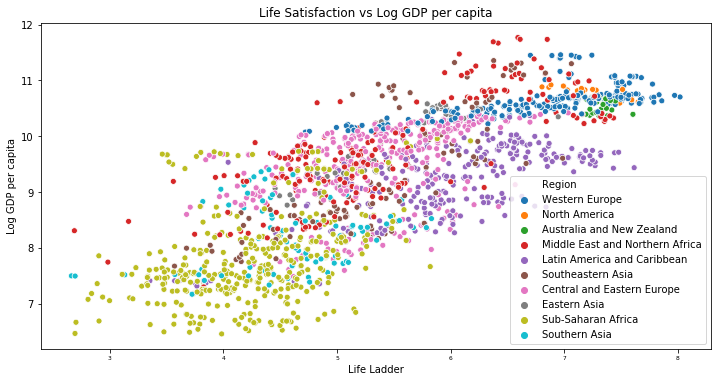

In [35]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6
sns.scatterplot(y = df['Log GDP per capita'],x= df['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Log GDP per capita");

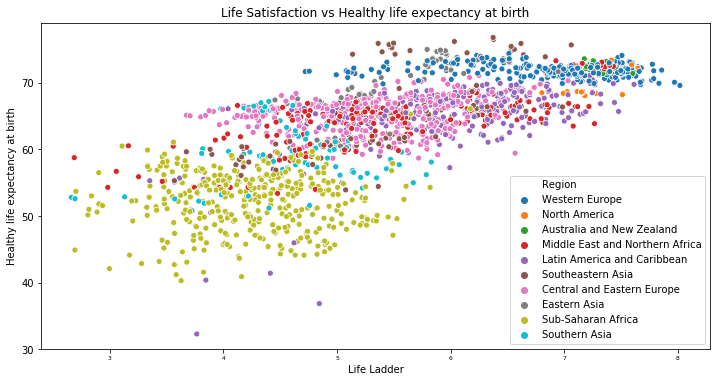

In [36]:
sns.scatterplot(y = df['Healthy life expectancy at birth'],x= df['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Healthy life expectancy at birth");

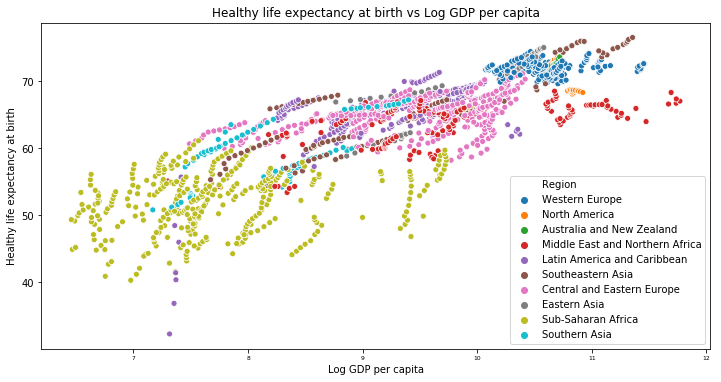

In [37]:
sns.scatterplot(y = df['Healthy life expectancy at birth'],x= df['Log GDP per capita'],hue=df['Region'])
plt.title("Healthy life expectancy at birth vs Log GDP per capita");

### notes on simulation...

Simulation can involves repeated random sampling to get an approximate solution. A random sample is generated and this process can be repeated many times to see how often you would expect to get the outcome you did get. Repeating the process gives multiple outcomes. Can then get the average across all simulations.

Simulations produce multiple sample outcomes. Experiments can be run by modifying inputs and seeing how this changes the output.
If there are multiple variables with relationships between the variables, then 
### Simulation steps:
1. define possible outcomes for random variables. (use sample statistics from the sample dataset)

### resampling methods
Bootstrapping is the most common.
This involves sampling with replacement. 

I have 138 observed Life Ladder scores 'Life Ladder' variable in df18.
Draw a random sample with replacement from 'Life Ladder'.

### T-tests
The one-sample t-test is used to estimate the chances that the sample came from a particular distribution.
As the sample mean is considered an unbiased estimator for the population mean, it can be used in the t-test formula in place of the population parameter. 

The t-test is a measure of the sample mean divided by the standard error of the sample mean.
The estimated standard error equals the standard error of the sample = s / square root N

t = (Sample mean - population mean) / sample standard error.
t gives a measure of the confidence.



Taken a sample of the data (the dataset) and looked at the mean and the standard deviation. Studied the distribution using the histogram and through this learn the properties of the data. Together the mean and the standard deviation can give a good description of the data. If the ratio of the mean to the standard deviation gives a big number then it gives more confidence that the mean is representative of the data whereas if it is small then less so.
The ratio of the mean of the sample to the variation in the sample.
The t-test is simular except the denominator is the standard error of the mean (which is the standard deviation of the sampling distribution of the mean).
t is a property of the data collected, computed using a sample mean and a sample standard error and therefore is a sample statistic.It is a measure of confidence and the bigger it gets the more confident we can be in the mean difference being measured.

- the sample standard deviation is the square root of the sample variance (using N-1)
- the standard error of the mean is the standard deviation divided by the square root of N.
SEM=s/square root of N.

t is the difference between the sample mean and the population mean divided by the standard error of the mean.
If you take different samples from the same distribution they will not be identical due to sampling error.
I could use the t-test to test whether the simulated sample comes from the same population as the data.

# t-test! here

<https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/>

In [44]:
17.92/np.sqrt(10)

5.666801567021736

### Pair Plots of the distributions

In [38]:
variables = df.loc[:,('Region','Life Ladder','Log GDP per capita', 'Social support')]


/Users/angelacorkery/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/angelacorkery/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


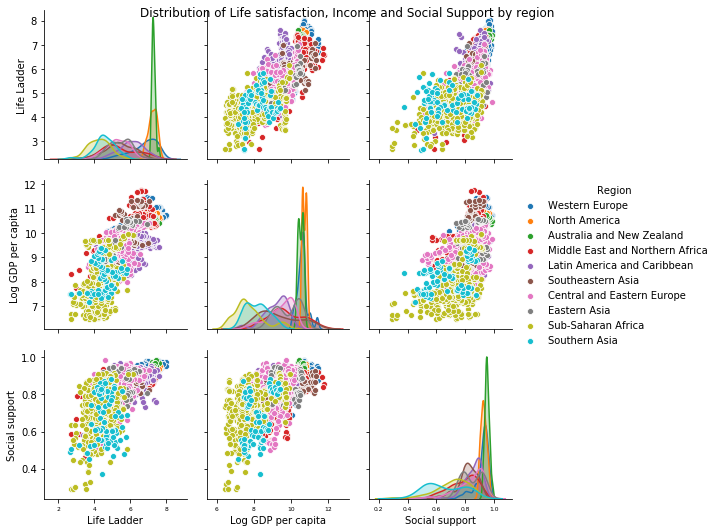

In [39]:
sns.pairplot(df.loc[:,('Region','Life Ladder','Log GDP per capita', 'Social support')], hue="Region")
plt.suptitle("Distribution of Life satisfaction, Income and Social Support by region");

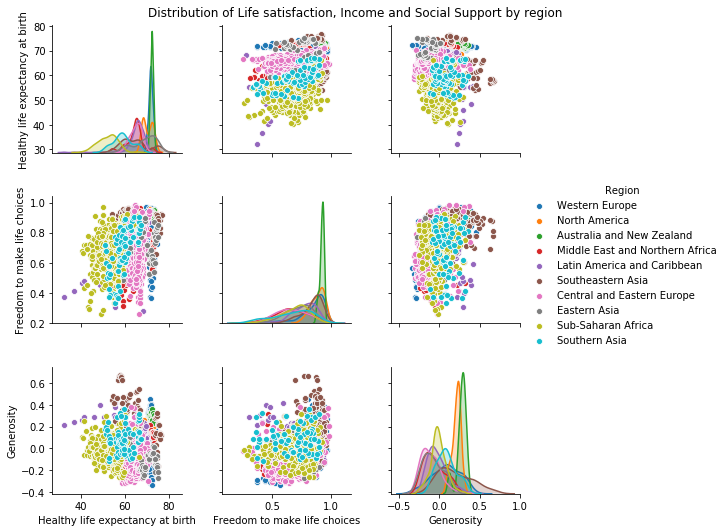

In [34]:
sns.pairplot(df.loc[:,('Region','Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity')], hue="Region")
plt.suptitle("Distribution of Life satisfaction, Income and Social Support by region");

In [40]:
df.columns

Index(['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [41]:
# summary statistics of 2018 data
df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
count,1704.000000,1704.000000,1676.000000,1691.000000,1676.000000,1675.000000,1622.000000,1608.000000,1685.000000,1691.000000,1530.000000,1558.000000,1559.000000,1704.000000,1704.000000,643.000000,1502.000000,1335.000000
mean,2012.332160,5.437155,9.222456,0.810570,63.111971,0.733829,0.000079,0.751315,0.709368,0.265679,0.481973,-0.136053,-0.001390,2.026707,0.392121,0.370000,0.385438,0.447771
std,3.688072,1.121149,1.185794,0.119210,7.583622,0.144115,0.163365,0.186074,0.107984,0.084707,0.192059,0.876074,0.975849,0.401484,0.124661,0.083232,0.082396,0.108505
min,2005.000000,2.661718,6.457201,0.290184,32.299999,0.257534,-0.336385,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.240000,0.211000,0.200969
25%,2009.000000,4.610970,8.304428,0.747512,58.299999,0.638436,-0.115534,0.696083,0.621855,0.205414,0.334735,-0.790461,-0.711416,1.743369,0.310139,0.305000,0.321429,0.368424
50%,2012.000000,5.339557,9.406206,0.833098,65.000000,0.752731,-0.022080,0.805775,0.718541,0.254544,0.464109,-0.227386,-0.218633,1.973070,0.372744,0.352000,0.371000,0.426541
75%,2015.000000,6.273522,10.193060,0.904432,68.300003,0.848155,0.093522,0.876458,0.801530,0.314896,0.614862,0.650468,0.699971,2.242300,0.456311,0.428000,0.432200,0.514803
max,2018.000000,8.018934,11.770276,0.987343,76.800003,0.985178,0.677743,0.983276,0.943621,0.704590,0.993604,1.575009,2.184725,3.718958,1.022769,0.634000,0.626000,0.961435


In [42]:
# summary statistics
df18.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
count,136.0,136.000000,127.000000,136.000000,132.000000,136.000000,126.000000,129.000000,135.000000,135.000000,123.000000,0.0,0.0,136.000000,136.000000,0.0,123.000000,133.000000
mean,2018.0,5.502134,9.250394,0.810544,64.670832,0.784535,-0.029086,0.731744,0.709628,0.293670,0.495120,NaN,NaN,2.276788,0.441216,NaN,0.386156,0.461921
std,0.0,1.103461,1.186589,0.116332,6.728247,0.117821,0.156355,0.186574,0.111807,0.088841,0.201564,NaN,NaN,0.531355,0.164885,NaN,0.083415,0.128460
min,2018.0,2.694303,6.541033,0.484715,48.200001,0.373536,-0.336385,0.096563,0.424125,0.092696,0.079710,NaN,NaN,1.198477,0.165445,NaN,0.211000,0.200969
25%,2018.0,4.721326,8.346278,0.739719,59.074999,0.718168,-0.150491,0.691070,0.639331,0.219076,0.331201,NaN,NaN,1.874964,0.315612,NaN,0.325829,0.367195
50%,2018.0,5.468088,9.415703,0.836641,66.350002,0.795636,-0.038196,0.793091,0.735343,0.287358,0.468837,NaN,NaN,2.200555,0.414548,NaN,0.371000,0.434313
75%,2018.0,6.277691,10.166517,0.905608,69.075001,0.877017,0.063073,0.851382,0.794049,0.359979,0.628473,NaN,NaN,2.639477,0.555323,NaN,0.432100,0.552091
max,2018.0,7.858107,11.453928,0.984489,76.800003,0.969898,0.499378,0.952014,0.883581,0.543836,0.988120,NaN,NaN,3.718958,0.938136,NaN,0.626000,0.786517


# Simulate some data
## Life Ladder and Log GDP per capita


Here I will start by looking  more closely at these two variables and attempt a simulation.
First I will look at the variables independently and then I will look to see if I can replicate any relationship that exists in the real data. The scatterplot above did show a positive looking relationship between the two variables where the Life Ladder score did seem to rise with the Log GDP per capita.

Plot the distribution of Life Ladder:

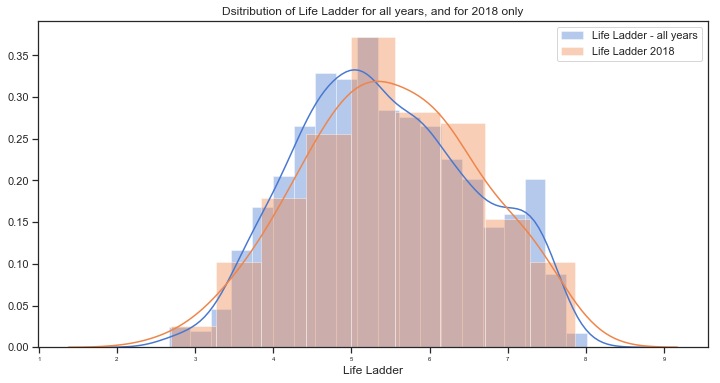

In [132]:
sns.distplot(df['Life Ladder'], label="Life Ladder - all years")
sns.distplot(df18['Life Ladder'], label="Life Ladder 2018")
plt.title("Distribution of Life Ladder for all years, and for 2018 only")
plt.legend();

# Simulate some data

<https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/>


### Life Ladder

This variable looks like it is normally distributed. There are some tests to check for normality

In [ ]:
df['Life Ladder']
df18['Life Ladder']

In [ ]:
data =

#### Tests for normality:
-  <https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/>
- 

In [56]:
# adapted from Example of the Shapiro-Wilk Normality Test
# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
# import the shapiro test from scipy stats
from scipy.stats import shapiro
# the data is the Life Ladder variable from the 2018 dataset
data = df17['Life Ladder']
# calculate the test statistic and the p-value to interpret the test
stat, p = shapiro(data)
# interpret the test
alpha= 0.05
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('The sample is probably Gaussian')
else:
    print('The sample is probably not Gaussian')

stat=0.986, p=0.155
The sample is probably Gaussian


In [50]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df18['Life Ladder']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=2.435, p=0.296
Sample looks Gaussian (fail to reject H0)


In [60]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df18['Life Ladder']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=2.435, p=0.296
Sample looks Gaussian (fail to reject H0)


In [65]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = df18['Life Ladder']
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.235
15.000: 0.560, data looks normal (fail to reject H0)
10.000: 0.638, data looks normal (fail to reject H0)
5.000: 0.766, data looks normal (fail to reject H0)
2.500: 0.893, data looks normal (fail to reject H0)
1.000: 1.062, data looks normal (fail to reject H0)


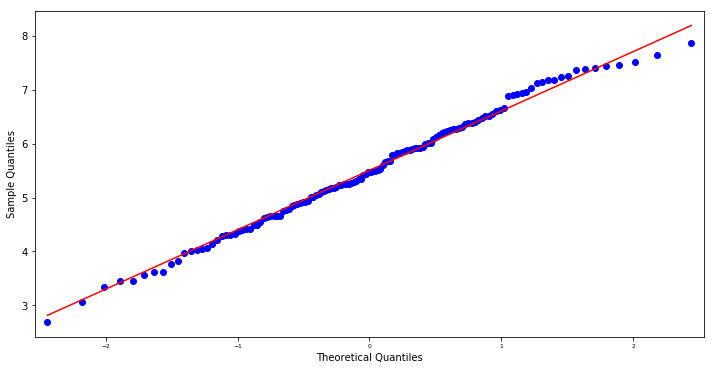

In [69]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = df18['Life Ladder']
# q-q plot
qqplot(data, line='s')
pyplot.show()

The distribution of Life Ladder values from the dataset containing several years does not appear to be normally distributed but more importantly the data for just 2018 is. This may be because the total data contains different numbers of variables for each year. I will use the mean and standard deviation based on the 2018 data.

If I subset the dataset (based on Table 2.1 data) and apply the tests above for normality to each annual dataset, the results all show that the annual datasets are probablyt normal.

In [57]:
df17=df.loc[df.loc[:,'Year']==2017]
df17.shape
df16=df.loc[df.loc[:,'Year']==2016]
df16.shape
df15=df.loc[df.loc[:,'Year']==2015]
df15.shape

(143, 20)

#### Simulate a single dataset using np.random.normal:

In [76]:
print(f" The mean of the sample dataset for 2018 is {df18['Life Ladder'].mean()} ")
print(f" The standard deviation of the sample dataset for 2018 is {df18['Life Ladder'].std()} ")
df18.shape

 The mean of the sample dataset for 2018 is 5.502134340650895 
 The standard deviation of the sample dataset for 2018 is 1.1034612436939353 


(136, 20)

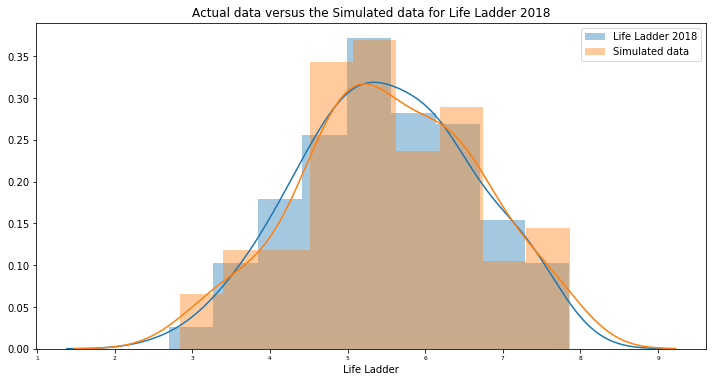

In [79]:
# simulate data based on 
# life ladder based on 
x= np.random.normal(df18['Life Ladder'].mean(),df18['Life Ladder'].std(),136)

sns.distplot(df18['Life Ladder'], label="Life Ladder 2018")
sns.distplot(x, label="Simulated data")
plt.title("Actual data versus the Simulated data for Life Ladder 2018")
plt.legend();

### Simulate using np.random.normal to generate many samples:

Here I use a for loop to run a number of different simulation using the mean and standard deviation from my dataset for 2018.

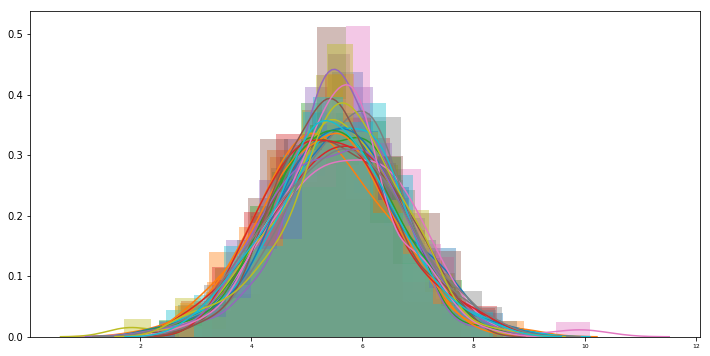

In [82]:
# loop through and plot a  number of simulations:
for i in range(20):
        Life_sim= np.random.normal(df18['Life Ladder'].mean(),df18['Life Ladder'].std(),136)
        # plot the distributions of the simulated data
        sns.distplot(Life_sim)


### look at the results of the simulation:

In [83]:
Life_sim

array([5.2066, 6.1562, 4.552 , ..., 7.8652, 5.1994, 3.8142])

In [84]:
print("Samples from the simulation")
print(f"mean: {np.mean(Life_sim)}")
print(f" min :{np.min(Life_sim)}")
print(f" max: {np.max(Life_sim)}")
print(f"standard deviation:{np.std(Life_sim)}")
print(f"{len(Life_sim)}")

Samples from the simulation
mean: 5.479253034900642
 min :2.963341061522805
 max: 8.345771011920686
standard deviation:1.0894307162111279
136


### Simulate using bootstrap method:

Bootstrapped Mean Length = 5.488230435696303, 95% CI = [5.3467 5.6622]


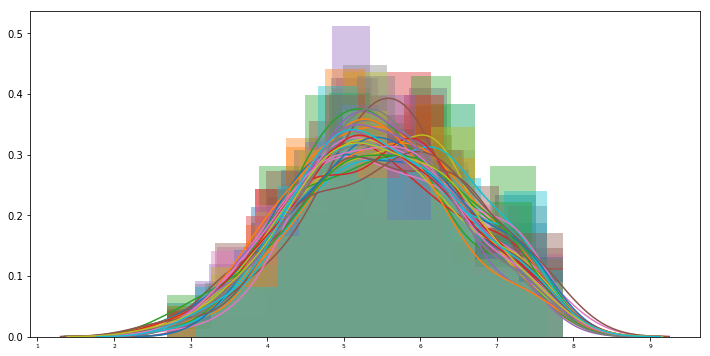

In [87]:
# trying bootstrap adapted from datacamp: 
life=df18['Life Ladder']
# create a list to store the means of the samples, set the number of simulations
mean_life, sims = [], 30
# use loop to create 100 samples - takes very long to do 1000 
for i in range(sims):
    # draw a random sample from life with replacement and store it in life_sample
    life_sample=np.random.choice(life, replace=True, size=len(life))
    # calculate the mean of each sample
    sns.distplot(life_sample)
    sample_mean = np.mean(life_sample)
    # append the mean of each sample to mean_lifes
    mean_life.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_life)
boot_95_ci = np.percentile(mean_life, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

In [88]:
print("Samples from the simulation")
print(f"mean: {life_sample.mean()}")
print(f" min :{life_sample.min()}")
print(f" max: {life_sample.max()}")
print(f"standard deviation:{life_sample.std()}")
print(f"{len(life_sample)}")

Samples from the simulation
mean: 5.494356113321641
 min :3.0575139522552486
 max: 7.858107089996338
standard deviation:1.0668149169885308
136


### Social Support

In [104]:
df18.head()

,Country name,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
7,Switzerland,Western Europe,2018,7.508587,10.975945,0.930291,74.099998,0.926415,0.096369,0.301260,0.792226,0.191520,0.849979,NaN,NaN,1.639632,0.218368,NaN,0.328100,0.320725
26,Denmark,Western Europe,2018,7.648786,10.755594,0.958219,72.400002,0.935438,0.015593,0.150607,0.821423,0.206053,0.632478,NaN,NaN,1.651060,0.215859,NaN,0.267000,0.479051
34,Norway,Western Europe,2018,7.444262,11.085626,0.965962,73.199997,0.960429,0.075728,0.268201,0.827414,0.211862,0.679503,NaN,NaN,1.519595,0.204130,NaN,0.272231,0.336649
47,Canada,North America,2018,7.175497,10.701248,0.922719,73.599998,0.945783,0.097966,0.371741,0.823669,0.259398,0.610467,NaN,NaN,1.764457,0.245900,NaN,0.336800,0.465442
58,Finland,Western Europe,2018,7.858107,10.636060,0.962155,71.900002,0.937807,-0.131735,0.198605,0.781546,0.181781,0.555102,NaN,NaN,1.425612,0.181419,NaN,0.275615,0.362294


#### Plot the distribution of Social Support:

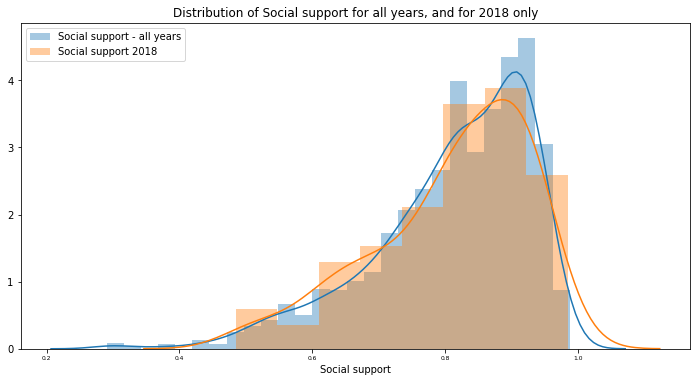

In [90]:
sns.distplot(df['Social support'].dropna(), label="Social support - all years")
sns.distplot(df18['Social support'], label="Social support 2018")
plt.title("Distribution of Social support for all years, and for 2018 only")
plt.legend();

This does not look normal. It is a left skewed distribution.

#### Tests for normality:
-  <https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/>
- 

In [91]:
# adapted from Example of the Shapiro-Wilk Normality Test
# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
# import the shapiro test from scipy stats
from scipy.stats import shapiro
# the data is the Life Ladder variable from the 2018 dataset
data = df18['Social support']
# calculate the test statistic and the p-value to interpret the test
stat, p = shapiro(data)
# interpret the test
alpha= 0.05
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('The sample is probably Gaussian')
else:
    print('The sample is probably not Gaussian')

stat=0.918, p=0.000
The sample is probably not Gaussian


In [92]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df18['Social support']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=15.055, p=0.001
Sample does not look Gaussian (reject H0)


In [93]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df18['Social support']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=15.055, p=0.001
Sample does not look Gaussian (reject H0)


In [94]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = df18['Social support']
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.489
15.000: 0.560, data does not look normal (reject H0)
10.000: 0.638, data does not look normal (reject H0)
5.000: 0.766, data does not look normal (reject H0)
2.500: 0.893, data does not look normal (reject H0)
1.000: 1.062, data does not look normal (reject H0)


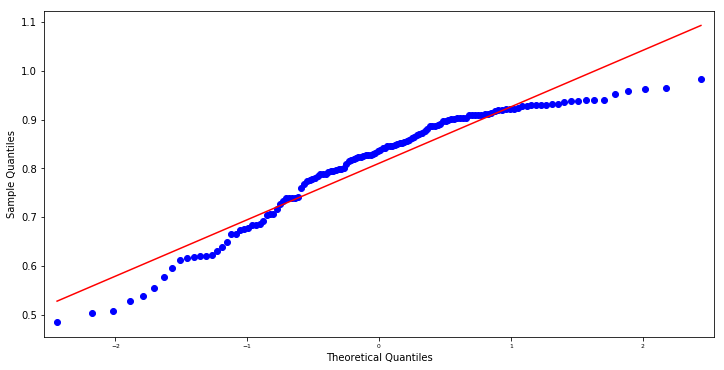

In [95]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
data = df18['Social support']
# q-q plot
qqplot(data, line='s')
pyplot.show()

The distribution of Social support values does not look to be normally distributed.
The tests for normality above showed that the data is not normally distributed.
This means that I can either look at why the data isn't normally distributed, maybe see how it can be made normally distributed or instead use nonparametric statistical methods instead of parametric methods.
I will try using the bootstrap resampling method.

>The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.
[machine learning mastery](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/)

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.

In [96]:
print(f" The mean of the sample dataset for 2018 is {df18['Social support'].mean()} ")
print(f" The standard deviation of the sample dataset for 2018 is {df18['Social support'].std()} ")
df18.shape

 The mean of the sample dataset for 2018 is 0.8105441362542265 
 The standard deviation of the sample dataset for 2018 is 0.11633213261117184 


(136, 20)

### Simulate using bootstrap method:
Here I use a loop to draw multiple random samples with replacements from the dataset. The mean is calculated for each sample and then all the means from the different samples are plotted to show their distribution.
A bootstrapped mean and confidence interval is then calculated. 

Bootstrapped Mean Length = 0.8118897618616328, 95% CI = [0.7953 0.8295]


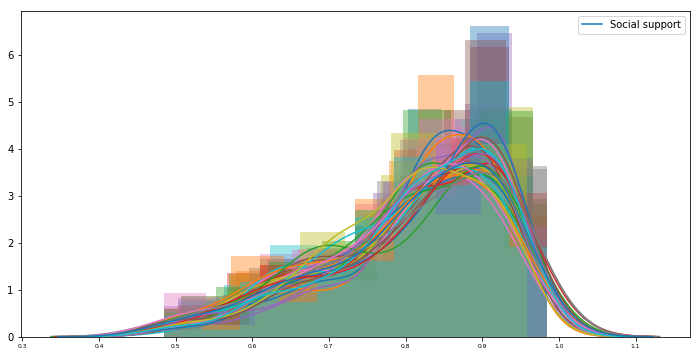

In [101]:
# trying bootstrap adapted from datacamp: 
social=df18['Social support']
# create a list to store the means of the samples, set the number of simulations
mean_social, sims = [], 30
# use loop to create 100 samples - takes very long to do 1000 
for i in range(sims):
    # draw a random sample from social with replacement and store it in social_sample
    social_sample=np.random.choice(social, replace=True, size=len(social))
    # calculate the mean of each sample
    sns.distplot(social_sample)
    sample_mean = np.mean(social_sample)
    # append the mean of each sample to mean_social
    mean_social.append(sample_mean)
    
# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_social)
boot_95_ci = np.percentile(mean_social, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))


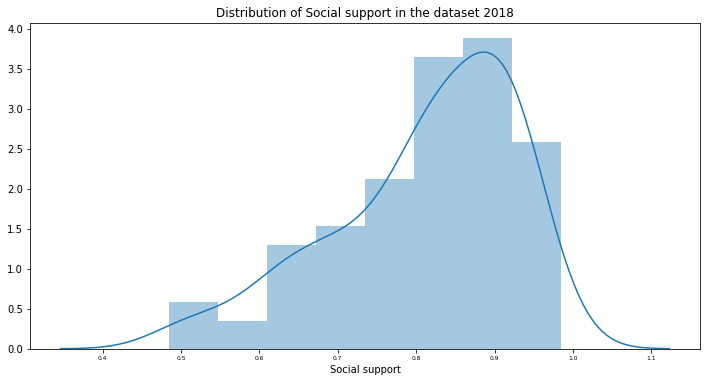

In [104]:
sns.distplot(social)
plt.title("Distribution of Social support in the dataset 2018");

#### Compare the results of the simulation to the actual data:

In [99]:
print("Samples from the simulation")
print(f"mean: {social_sample.mean()}")
print(f" min :{social_sample.min()}")
print(f" max: {social_sample.max()}")
print(f"standard deviation:{social_sample.std()}")
print(f"{len(social_sample)}")

Samples from the simulation
mean: 0.8126491509816226
 min :0.5035440325737001
 max: 0.9844889640808104
standard deviation:0.10462463360715163
136


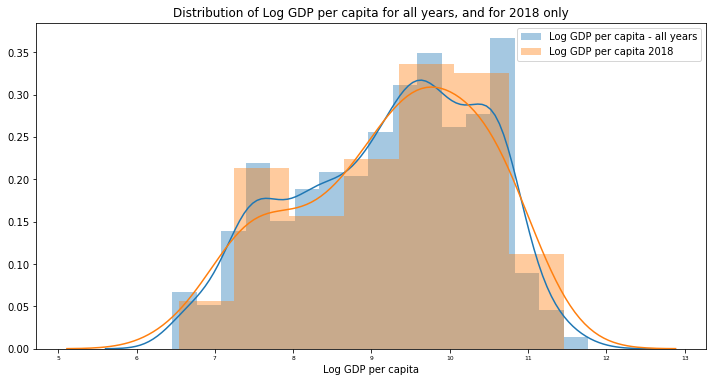

In [43]:
sns.distplot(df['Log GDP per capita'].dropna(), label="Log GDP per capita - all years")
sns.distplot(df18['Log GDP per capita'].dropna(), label="Log GDP per capita 2018")
plt.title("Distribution of Log GDP per capita for all years, and for 2018 only")
plt.legend();

Have dataframe df with Life Ladder and Log GDP per capita.
Looking for the median Life Ladder score and the correlation between Log GDL and life ladder,

In [141]:
df2=df.loc[:,['Life Ladder','Log GDP per capita']]
df2.head()

,Life Ladder,Log GDP per capita
0,7.473253,10.906543
1,7.524521,10.911548
2,7.776209,10.935776
3,7.492804,10.954624
4,7.572137,10.955430


### using a loop to simulate using np.random.normal

In [159]:
# set the number of simulation
sims = 1000
# create a list to hold the means 
means = [0]
# run 100 separate simulation using np.random.normal
for i in range(sims):
    # run a simulation
    x= np.random.normal(5.437155,1.121149,1700)
    # append the mean to 
    means.append(np.mean(x))

In [160]:
np.mean(means)

5.432051788798936

Just trying to loop through and plot to each axes. not quite working as getting the following error:
AttributeError: 'numpy.ndarray' object has no attribute 'plot'
Will come back later. Just plot each distribution separately for now.

```python
f,axes=plt.subplots(1,3, figsize=(12,6))
# need to leave out the NaN's
Z= df.dropna()
# loop through each of the countries in the region and plot the distributions
# loop through range 0 to 3, plot distribution for each variable
for i in range(3),j in Z.iloc[:, 3:5]:
    # set the axes to the i
    a=i
    print(a)
    sns.distplot(Z[j], ax=axes[i])
```       

In [35]:
df.columns

Index(['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

### Distribution of variables for all years in the dataset globally:

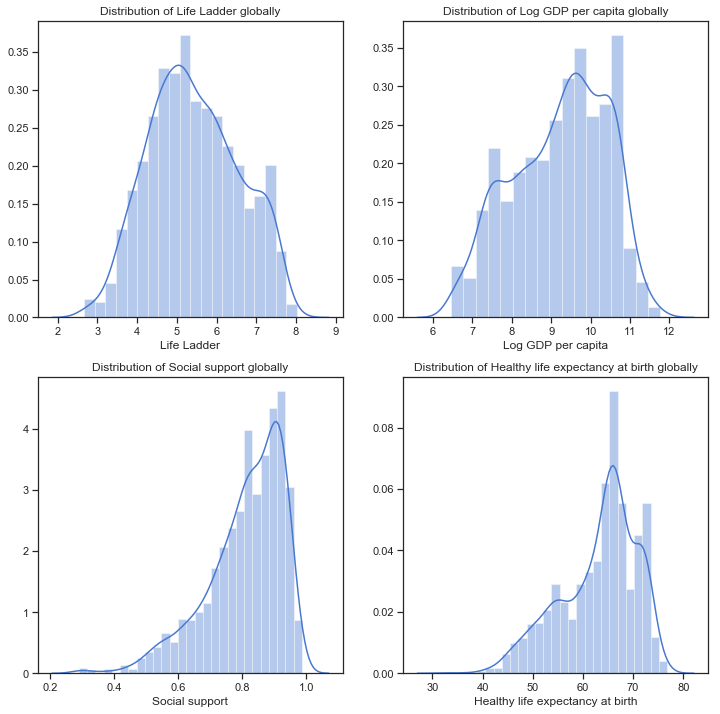

In [36]:
# set up the subplots
sns.set(style="ticks", palette="muted")
f,axes=plt.subplots(2,2, figsize=(12,12))

# plot the distributions of each of the main variables. At global level first. Look at Regional after

sns.distplot(df['Life Ladder'].dropna(), ax=axes[0,0]);
axes[0,0].set_title("Distribution of Life Ladder globally");

sns.distplot(df['Log GDP per capita'].dropna(), ax=axes[0,1]);
axes[0,1].set_title("Distribution of Log GDP per capita globally");

sns.distplot(df['Social support'].dropna(), ax=axes[1,0]);
axes[1,0].set_title("Distribution of Social support globally");

sns.distplot(df['Healthy life expectancy at birth'].dropna(), ax=axes[1,1]);
axes[1,1].set_title("Distribution of Healthy life expectancy at birth globally");
        

### Statistics of variables for all years in the dataset globally:

In [37]:
print("The summary statistics for the Table 2.1 variables in the World Happiness Report:")
df.describe()

The summary statistics for the Table 2.1 variables in the World Happiness Report:


,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
count,1704.000000,1704.000000,1676.000000,1691.000000,1676.000000,1675.000000,1622.000000,1608.000000,1685.000000,1691.000000,1530.000000,1558.000000,1559.000000,1704.000000,1704.000000,643.000000,1502.000000,1335.000000
mean,2012.332160,5.437155,9.222456,0.810570,63.111971,0.733829,0.000079,0.751315,0.709368,0.265679,0.481973,-0.136053,-0.001390,2.026707,0.392121,0.370000,0.385438,0.447771
std,3.688072,1.121149,1.185794,0.119210,7.583622,0.144115,0.163365,0.186074,0.107984,0.084707,0.192059,0.876074,0.975849,0.401484,0.124661,0.083232,0.082396,0.108505
min,2005.000000,2.661718,6.457201,0.290184,32.299999,0.257534,-0.336385,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.240000,0.211000,0.200969
25%,2009.000000,4.610970,8.304428,0.747512,58.299999,0.638436,-0.115534,0.696083,0.621855,0.205414,0.334735,-0.790461,-0.711416,1.743369,0.310139,0.305000,0.321429,0.368424
50%,2012.000000,5.339557,9.406206,0.833098,65.000000,0.752731,-0.022080,0.805775,0.718541,0.254544,0.464109,-0.227386,-0.218633,1.973070,0.372744,0.352000,0.371000,0.426541
75%,2015.000000,6.273522,10.193060,0.904432,68.300003,0.848155,0.093522,0.876458,0.801530,0.314896,0.614862,0.650468,0.699971,2.242300,0.456311,0.428000,0.432200,0.514803
max,2018.000000,8.018934,11.770276,0.987343,76.800003,0.985178,0.677743,0.983276,0.943621,0.704590,0.993604,1.575009,2.184725,3.718958,1.022769,0.634000,0.626000,0.961435


### Distribution of variables for 2018 in the dataset at a  global level:

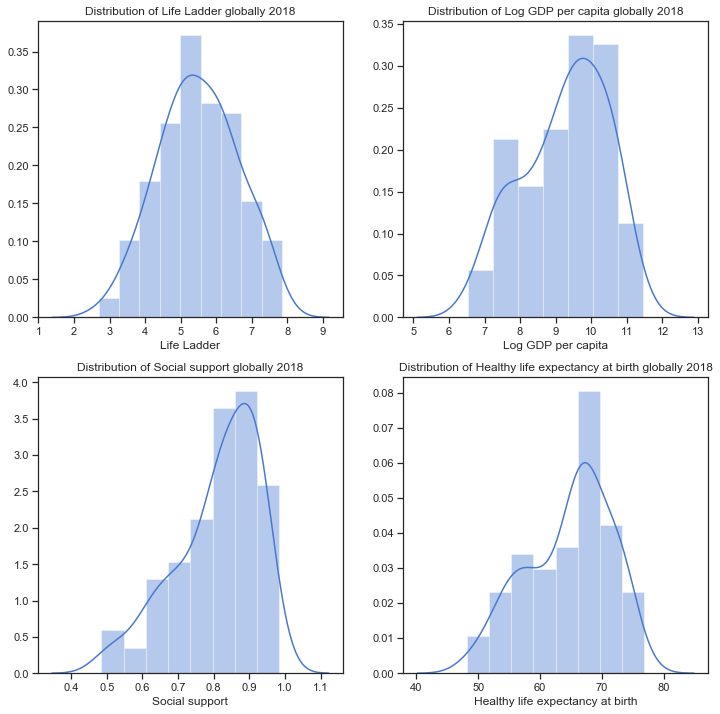

In [38]:
# set up the subplots
sns.set(style="ticks", palette="muted")
f,axes=plt.subplots(2,2, figsize=(12,12))

# plot the distributions of each of the main variables. At global level first. Look at Regional after

sns.distplot(df18['Life Ladder'].dropna(), ax=axes[0,0]);
axes[0,0].set_title("Distribution of Life Ladder globally 2018");

sns.distplot(df18['Log GDP per capita'].dropna(), ax=axes[0,1]);
axes[0,1].set_title("Distribution of Log GDP per capita globally 2018");

sns.distplot(df18['Social support'].dropna(), ax=axes[1,0]);
axes[1,0].set_title("Distribution of Social support globally 2018");

sns.distplot(df18['Healthy life expectancy at birth'].dropna(), ax=axes[1,1]);
axes[1,1].set_title("Distribution of Healthy life expectancy at birth globally 2018");
        

### Statistics of variables for 2018 in the dataset at a  global level:

In [39]:
print("The data available for 2018 only:")
df18.describe()

The data available for 2018 only:


,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year"
count,136.0,136.000000,127.000000,136.000000,132.000000,136.000000,126.000000,129.000000,135.000000,135.000000,123.000000,0.0,0.0,136.000000,136.000000,0.0,123.000000,133.000000
mean,2018.0,5.502134,9.250394,0.810544,64.670832,0.784535,-0.029086,0.731744,0.709628,0.293670,0.495120,NaN,NaN,2.276788,0.441216,NaN,0.386156,0.461921
std,0.0,1.103461,1.186589,0.116332,6.728247,0.117821,0.156355,0.186574,0.111807,0.088841,0.201564,NaN,NaN,0.531355,0.164885,NaN,0.083415,0.128460
min,2018.0,2.694303,6.541033,0.484715,48.200001,0.373536,-0.336385,0.096563,0.424125,0.092696,0.079710,NaN,NaN,1.198477,0.165445,NaN,0.211000,0.200969
25%,2018.0,4.721326,8.346278,0.739719,59.074999,0.718168,-0.150491,0.691070,0.639331,0.219076,0.331201,NaN,NaN,1.874964,0.315612,NaN,0.325829,0.367195
50%,2018.0,5.468088,9.415703,0.836641,66.350002,0.795636,-0.038196,0.793091,0.735343,0.287358,0.468837,NaN,NaN,2.200555,0.414548,NaN,0.371000,0.434313
75%,2018.0,6.277691,10.166517,0.905608,69.075001,0.877017,0.063073,0.851382,0.794049,0.359979,0.628473,NaN,NaN,2.639477,0.555323,NaN,0.432100,0.552091
max,2018.0,7.858107,11.453928,0.984489,76.800003,0.969898,0.499378,0.952014,0.883581,0.543836,0.988120,NaN,NaN,3.718958,0.938136,NaN,0.626000,0.786517


### Distribution of Figure 2.6 variables for 2018 in the dataset at a  global level:

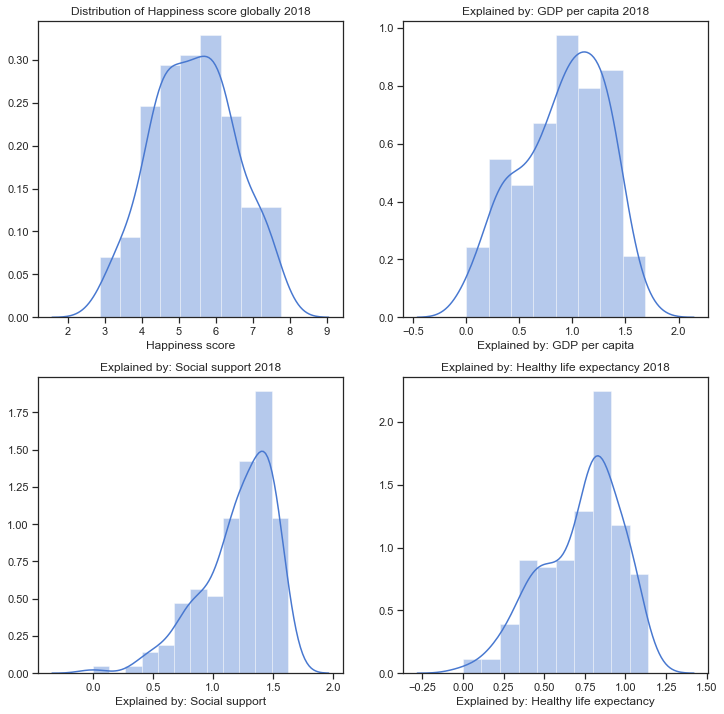

In [40]:
# set up the subplots
sns.set(style="ticks", palette="muted")
f,axes=plt.subplots(2,2, figsize=(12,12))

# plot the distributions of each of the main variables. At global level first. Look at Regional after

sns.distplot(df6['Happiness score'].dropna(), ax=axes[0,0]);
axes[0,0].set_title("Distribution of Happiness score globally 2018");

sns.distplot(df6['Explained by: GDP per capita'].dropna(), ax=axes[0,1]);
axes[0,1].set_title("Explained by: GDP per capita 2018");

sns.distplot(df6['Explained by: Social support'].dropna(), ax=axes[1,0]);
axes[1,0].set_title("Explained by: Social support 2018");

sns.distplot(df6['Explained by: Healthy life expectancy'].dropna(), ax=axes[1,1]);
axes[1,1].set_title("Explained by: Healthy life expectancy 2018");
        

### Statistics for 2018 in the dataset at a  global level:

In [41]:
print("The summary statistics for the data in Figure 2.6 of the World Happiness Report 2019:")
df6.describe()

The summary statistics for the data in Figure 2.6 of the World Happiness Report 2019:


,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407081,5.512013,5.302148,1.879917,0.905108,1.208793,0.725258,0.392550,0.184840,0.110616
std,1.113132,1.098555,1.128550,0.528787,0.398357,0.299175,0.242144,0.143320,0.095298,0.094540
min,2.852600,3.004615,2.700585,0.183267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544600,4.665040,4.436328,1.512799,0.602895,1.055672,0.548066,0.308071,0.108709,0.047094
50%,5.379550,5.471402,5.285471,1.916539,0.959741,1.271584,0.788698,0.417316,0.177740,0.085482
75%,6.184250,6.276417,6.070340,2.267635,1.232124,1.452774,0.881603,0.507297,0.248372,0.141005
max,7.768900,7.829888,7.707912,3.049498,1.684094,1.623651,1.140899,0.631246,0.565825,0.452687


## Overall Happiness score




### Life Ladder / Happiness score
Happiness Score or variable named Life Ladder or Cantril Life Ladder. The figures are the national average response to the question of life evaluations.
The values are the national average response to the question of life evaluations. The survey measure is from the January 2019 release of the Gallup World Survey covering the years from 2005 to 2018. 


### Distribution of Life Ladder and Happiness score variables:

Here I am looking at the statistics of the "Life Ladder" variables as well as the "Happiness score" variables from my three dataframes mentioned above. The distributions all seem to follow a normal distribution.
Then I will simulate some data  based on these statistics and plots.

In [78]:
df['Life Ladder'].describe()

count    1704.000000
mean        5.437155
std         1.121149
min         2.661718
25%         4.610970
50%         5.339557
75%         6.273522
max         8.018934
Name: Life Ladder, dtype: float64

In [79]:
df18['Life Ladder'].describe()

count    136.000000
mean       5.502134
std        1.103461
min        2.694303
25%        4.721326
50%        5.468088
75%        6.277691
max        7.858107
Name: Life Ladder, dtype: float64

In [81]:
df6['Happiness score'].describe()

count    156.000000
mean       5.407081
std        1.113132
min        2.852600
25%        4.544600
50%        5.379550
75%        6.184250
max        7.768900
Name: Happiness score, dtype: float64

In [107]:
# simulate data for happiness score  and life ladder based on statistics above
HS = np.random.normal(5.407,1.113, 156)
LL=np.random.normal(5.502,1.103,156)

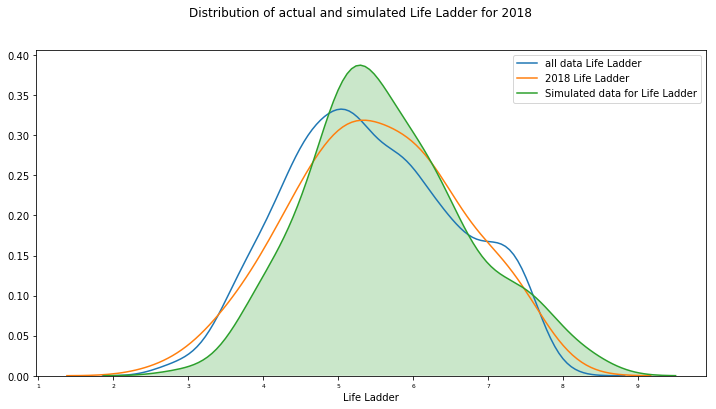

In [115]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

sns.distplot(df['Life Ladder'], hist=False, label="all data Life Ladder");
sns.distplot(df18['Life Ladder'],hist=False, label="2018 Life Ladder");
sns.kdeplot(LL, label="Simulated data for Life Ladder", shade=True)
plt.suptitle("Distribution of actual and simulated Life Ladder for 2018");

Text(0.5, 0.98, 'Simulated and actual data for Happiness Score for 2018')

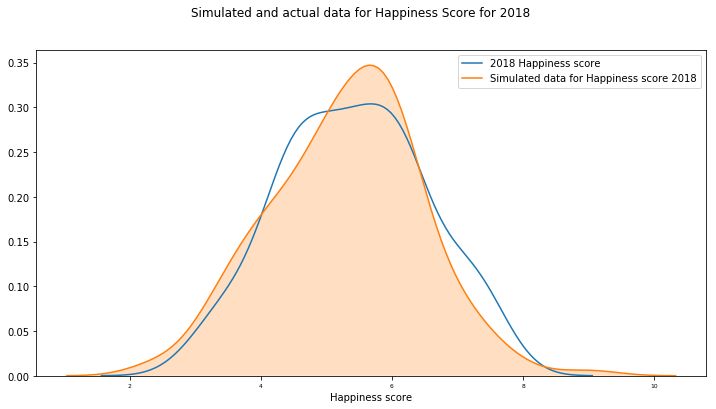

In [116]:
sns.distplot(df6['Happiness score'],hist=False, label="2018 Happiness score");
sns.kdeplot(HS, label="Simulated data for Happiness score 2018", shade=True)

plt.suptitle("Simulated and actual data for Happiness Score for 2018")

Note that while the life ladder data can be simulated like this, the happiness score is calculated based on the other variables so I don't think I should be directly simulating this. For here just to see what it looks like and how it relates to the life ladder. The happiness score is a bit left skewed.


# Log GDP per capita
Log GDP per capita from Table 2.1
Explained by: GDP per capita from Figure 2.6

In [120]:
df['Log GDP per capita'].describe()

count    1676.000000
mean        9.222456
std         1.185794
min         6.457201
25%         8.304428
50%         9.406206
75%        10.193060
max        11.770276
Name: Log GDP per capita, dtype: float64

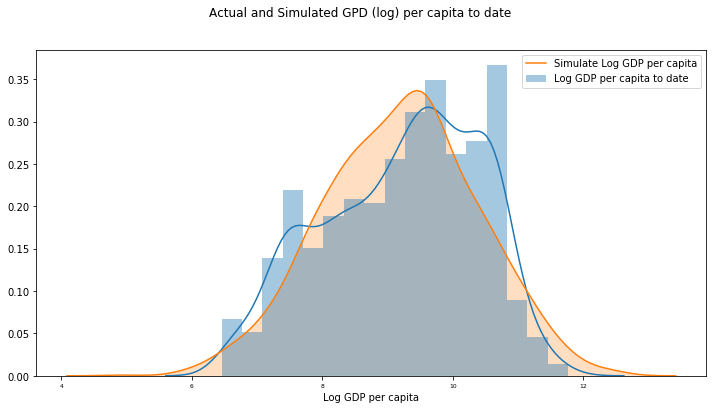

In [132]:
GDP=np.random.normal(9.222,1.18,1676)
sns.distplot(df['Log GDP per capita'].dropna(), label="Log GDP per capita to date")
sns.kdeplot(GDP,label="Simulate Log GDP per capita", shade=True)
plt.suptitle("Actual and Simulated GPD (log) per capita to date")
plt.legend;

In [123]:
df18['Log GDP per capita'].describe()

count    127.000000
mean       9.250394
std        1.186589
min        6.541033
25%        8.346278
50%        9.415703
75%       10.166517
max       11.453928
Name: Log GDP per capita, dtype: float64

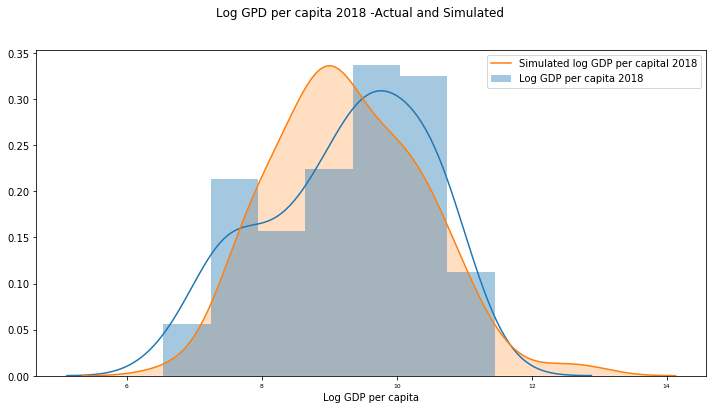

In [134]:
gdp18=np.random.normal(9.250,1.18,127)
sns.distplot(df18['Log GDP per capita'].dropna(), label="Log GDP per capita 2018")
sns.kdeplot(gdp18, shade=True, label="Simulated log GDP per capital 2018")
plt.legend()
plt.suptitle("Log GPD per capita 2018 -Actual and Simulated");

In [135]:
df6['Explained by: GDP per capita'].describe()

count    156.000000
mean       0.905108
std        0.398357
min        0.000000
25%        0.602895
50%        0.959741
75%        1.232124
max        1.684094
Name: Explained by: GDP per capita, dtype: float64

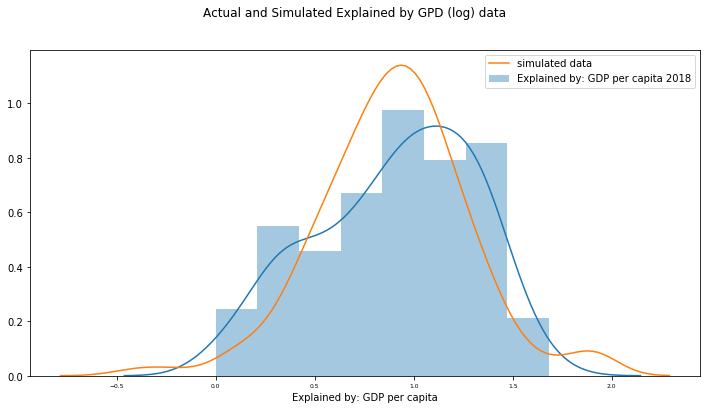

In [136]:
ExpGDP= np.random.normal(0.905,0.398,156)
sns.distplot(df6['Explained by: GDP per capita'].dropna(), label="Explained by: GDP per capita 2018")
sns.kdeplot(ExpGDP, label="simulated data")
plt.suptitle("Actual and Simulated Explained by GPD (log) data")
plt.legend();

In [137]:
df.columns

Index(['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

# Healthy Life Expectancy
- Healthy life expectancy at birth from Table 2.1
- Explained by: Healthy life expectancy from Figure 2.6

In [141]:
df.columns

Index(['Country name', 'Region', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [142]:
df['Healthy life expectancy at birth'].describe()

count    1676.000000
mean       63.111971
std         7.583622
min        32.299999
25%        58.299999
50%        65.000000
75%        68.300003
max        76.800003
Name: Healthy life expectancy at birth, dtype: float64

In [144]:
HLE=np.random.normal(63.11,7.583,1676)

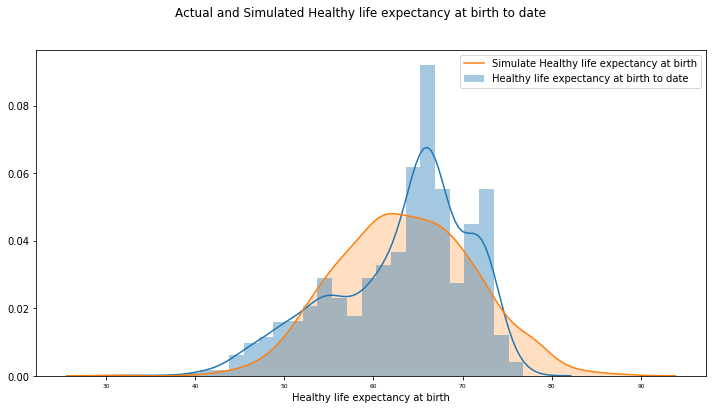

In [145]:
sns.distplot(df['Healthy life expectancy at birth'].dropna(), label="Healthy life expectancy at birth to date")
sns.kdeplot(HLE,label="Simulate Healthy life expectancy at birth", shade=True)
plt.suptitle("Actual and Simulated Healthy life expectancy at birth to date")
plt.legend;

In [146]:
df6['Explained by: Healthy life expectancy'].describe()

count    156.000000
mean       0.725258
std        0.242144
min        0.000000
25%        0.548066
50%        0.788698
75%        0.881603
max        1.140899
Name: Explained by: Healthy life expectancy, dtype: float64

In [147]:
EHLE=np.random.normal(0.7253,0.242,156)


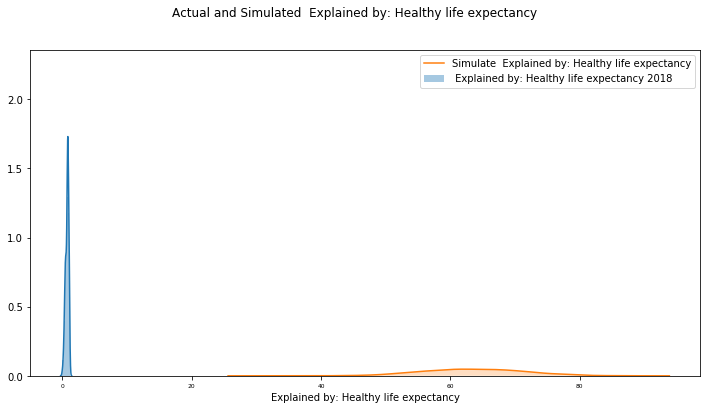

In [148]:
sns.distplot(df6['Explained by: Healthy life expectancy'].dropna(), label=" Explained by: Healthy life expectancy 2018")
sns.kdeplot(HLE,label="Simulate  Explained by: Healthy life expectancy", shade=True)
plt.suptitle("Actual and Simulated  Explained by: Healthy life expectancy")
plt.legend;

# HERE!

# Here! run everything to here.
This is where I leave it for now.
as expected Health life expectancy variables are not normally distributed.
There are large variations within reasons.
Look at pareto and power distributions.


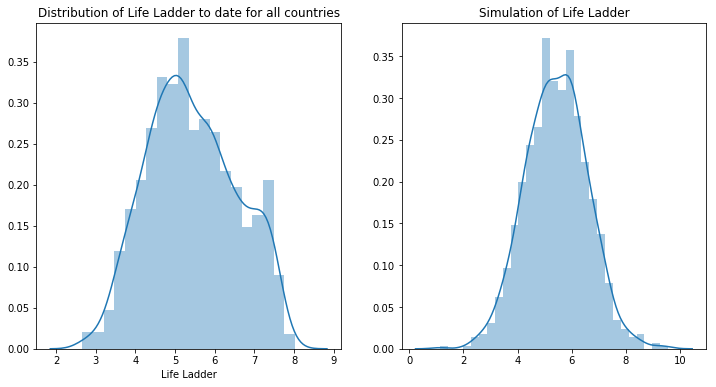

In [236]:

f,axes = plt.subplots(1,2,figsize=(12,6))
sns.distplot(df['Life Ladder'].dropna(), ax=axes[0])
axes[0].set_title("Distribution of Life Ladder to date for all countries");
sns.distplot(s, ax=axes[1])
axes[1].set_title("Simulation of Life Ladder");

## Regions and Countries

In [246]:
df['Life Ladder'].describe()


count    1667.000000
mean        5.438695
std         1.124814
min         2.661718
25%         4.608125
50%         5.326222
75%         6.275756
max         8.018934
Name: Life Ladder, dtype: float64

In [249]:
df.groupby('Region').describe()

Year                                         \
                                 count         mean       std     min     25%   
Region                                                                          
Australia and New Zealand         24.0  2012.208333  3.945048  2005.0  2009.5   
Central and Eastern Europe       341.0  2012.360704  3.634246  2005.0  2009.0   
Eastern Asia                      50.0  2012.160000  3.765363  2005.0  2009.0   
Latin America and Caribbean      255.0  2011.976471  3.756285  2005.0  2009.0   
Middle East and Northern Africa  196.0  2012.443878  3.549202  2005.0  2010.0   
North America                     26.0  2011.961538  3.883099  2005.0  2009.0   
Southeastern Asia                102.0  2012.068627  3.805311  2006.0  2009.0   
Southern Asia                     78.0  2012.153846  3.675390  2005.0  2009.0   
Sub-Saharan Africa               364.0  2012.513736  3.648816  2006.0  2010.0   
Western Europe                   231.0  2012.489177  3.749622  2005.0  2010.0   

                                                         Life Ladder  \
                                    50%      75%     max       count   
Region                                                                 
Australia and New Zealand        2012.5  2015.25  2018.0        24.0   
Central and Eastern Europe       2013.0  2015.00  2018.0       341.0   
Eastern Asia                     2012.0  2015.00  2018.0        50.0   
Latin America and Caribbean      2012.0  2015.00  2018.0       255.0   
Middle East and Northern Africa  2012.0  2015.00  2018.0       196.0   
North America                    2012.0  2015.00  2018.0        26.0   
Southeastern Asia                2012.0  2015.00  2018.0       102.0   
Southern Asia                    2012.0  2015.00  2018.0        78.0   
Sub-Saharan Africa               2013.0  2016.00  2018.0       364.0   
Western Europe                   2013.0  2016.00  2018.0       231.0   

                                           ...  \
                                     mean  ...   
Region                                     ...   
Australia and New Zealand        7.310778  ...   
Central and Eastern Europe       5.312654  ...   
Eastern Asia                     5.472610  ...   
Latin America and Caribbean      6.005356  ...   
Middle East and Northern Africa  5.399168  ...   
North America                    7.265042  ...   
Southeastern Asia                5.342963  ...   
Southern Asia                    4.587340  ...   
Sub-Saharan Africa               4.262331  ...   
Western Europe                   6.808758  ...   

                                Most people can be trusted, WVS round 2005-2009  \
                                                                            75%   
Region                                                                            
Australia and New Zealand                                              0.511602   
Central and Eastern Europe                                             0.247649   
Eastern Asia                                                           0.496780   
Latin America and Caribbean                                            0.154984   
Middle East and Northern Africa                                        0.308731   
North America                                                          0.418500   
Southeastern Asia                                                      0.486311   
Southern Asia                                                          0.206897   
Sub-Saharan Africa                                                     0.171558   
Western Europe                                                         0.534297   

                                           \
                                      max   
Region                                      
Australia and New Zealand        0.511602   
Central and Eastern Europe       0.288842   
Eastern Asia                     0.496780   
Latin America and Caribbean      0.284393 

#### Working with df and WH dataframes

In [251]:
df['Life Ladder'].describe()

count    1667.000000
mean        5.438695
std         1.124814
min         2.661718
25%         4.608125
50%         5.326222
75%         6.275756
max         8.018934
Name: Life Ladder, dtype: float64

In [29]:
WEur = df.loc[df.loc[:,'Region']=='Western Europe']
ANZ = df.loc[df.loc[:,'Region']=="Australia and New Zealand"]
CEE = df.loc[df.loc[:,'Region']=="Central and Eastern Europe"]
EA = df.loc[df.loc[:,'Region']=="Eastern Asia"]
LAC = df.loc[df.loc[:,'Region']=="Latin America and Caribbean"]
NA= df.loc[df.loc[:,'Region']=="North America"]
SEA=df.loc[df.loc[:,'Region']=="Southeastern Asia"]
SA=df.loc[df.loc[:,'Region']=="Southern Asia"]
SSA=df.loc[df.loc[:,'Region']=="Sub-Saharan Africa"]
MENA=df.loc[df.loc[:,'Region']=="Middle East and Northern Africa"]


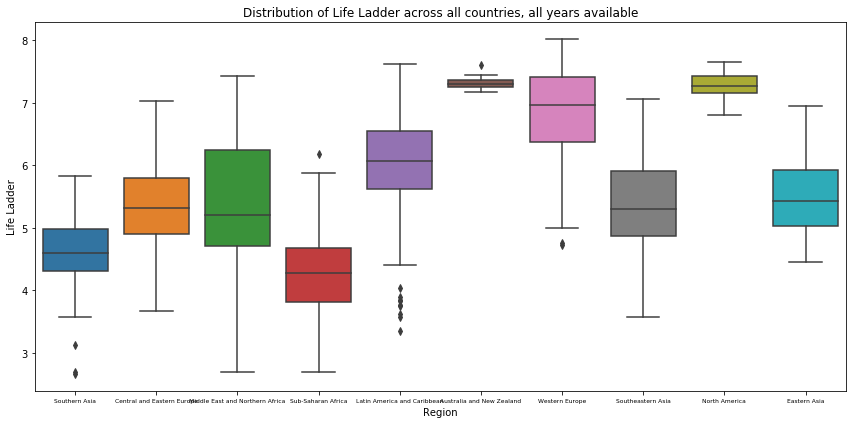

In [282]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Life Ladder'])
plt.title("Distribution of Life Ladder across all countries, all years available")


plt.tight_layout()
plt.show()

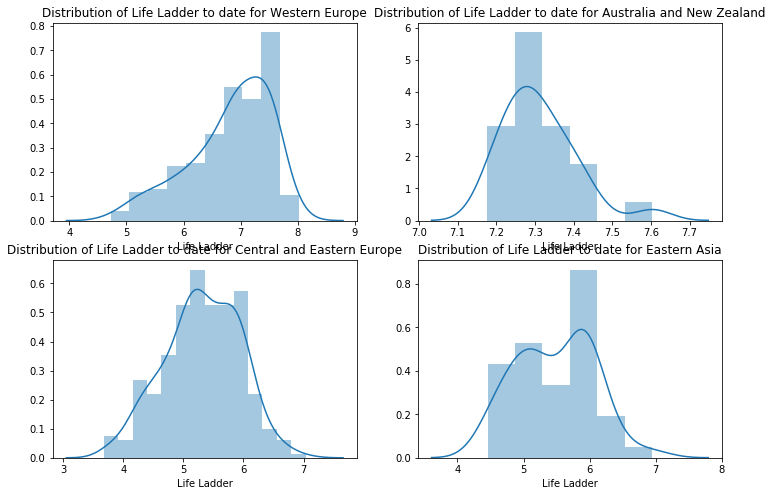

In [260]:
f,axes = plt.subplots(2,2,figsize=(12,8))
sns.distplot(WE['Life Ladder'].dropna(), ax=axes[0,0])
axes[0,0].set_title("Distribution of Life Ladder to date for Western Europe");
sns.distplot(ANZ['Life Ladder'].dropna(), ax=axes[0,1])
axes[0,1].set_title("Distribution of Life Ladder to date for Australia and New Zealand");
sns.distplot(CEE['Life Ladder'].dropna(), ax=axes[1,0])
axes[1,0].set_title("Distribution of Life Ladder to date for Central and Eastern Europe");
sns.distplot(EA['Life Ladder'].dropna(), ax=axes[1,1])
axes[1,1].set_title("Distribution of Life Ladder to date for Eastern Asia");

### Incomes and Happiness levels:

Higher national incomes go together with higher average life satisfaction. Countries with higher average national incomes tend to have higher average life satisfaction scores. The scatterplot below shows how higher levels of satisfaction or happiness are associated with higher levels of Log GDP per capita. This will need to be taken into consideration when simulating these two variables. 

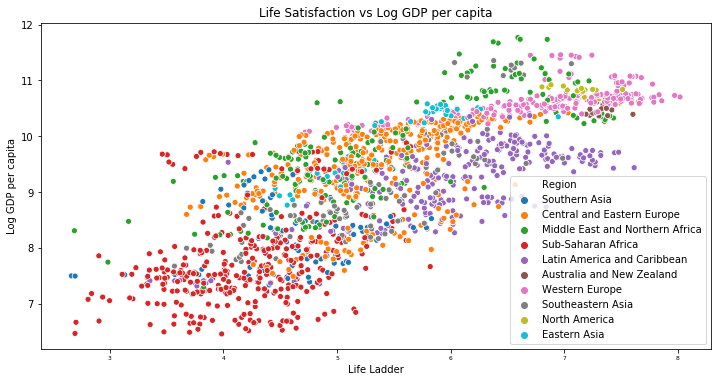

In [23]:
sns.scatterplot(y = df['Log GDP per capita'],x= df['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Log GDP per capita");

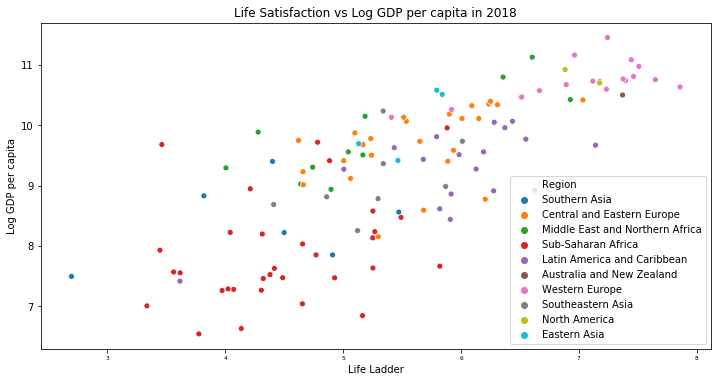

In [45]:
sns.scatterplot(y = df2018['Log GDP per capita'],x= df2018['Life Ladder'],hue=df['Region'])
plt.title("Life Satisfaction vs Log GDP per capita in 2018");

```python
WEur = df.loc[df.loc[:,'Region']=='Western Europe']
ANZ = df.loc[df.loc[:,'Region']=="Australia and New Zealand"]
CEE = df.loc[df.loc[:,'Region']=="Central and Eastern Europe"]
EA = df.loc[df.loc[:,'Region']=="Eastern Asia"]
LAC = df.loc[df.loc[:,'Region']=="Latin America and Caribbean"]
NA= df.loc[df.loc[:,'Region']=="North America"]
SEA=df.loc[df.loc[:,'Region']=="Southeastern Asia"]
SA=df.loc[df.loc[:,'Region']=="Southern Asia"]
SSA=df.loc[df.loc[:,'Region']=="Sub-Saharan Africa"]
MENA=df.loc[df.loc[:,'Region']=="Middle East and Northern Africa"]
```


# GDP per capita

The GDP per capita in the World Happiness Report dataset are in purchasing power parity at constant 2011 international dollar prices which are mainly from the World Development Indicators in 2018. The log of the GDP figures is taken.

Per capita GDP is the Total Gross Domestic Product for a country divided by its population. It breaks down a country's GDP per person and is considered a universal measure for gauging the prosperity of nations.

Regular “nominal” GDP divided by the current population is fine when looking at one point in time in a single country. “Nominal” means GDP per capita is measured in current dollars. When looking to compare GDP per capita between countries then the purchasing power parity GDP must be used. 

#### References

<https://ec.europa.eu/eurostat/statistics-explained/index.php/Beginners:GDP_-_Comparing_GDP:_growth_rate_and_per_capita#How_can_the_GDP_of_countries_of_different_sizes_be_compared.3F>

<https://www.thebalance.com/gdp-per-capita-formula-u-s-compared-to-highest-and-lowest-3305848>


<https://www.investopedia.com/terms/p/per-capita-gdp.asp>

<http://www.columbia.edu/~so33/SusDev/Lecture_1.pdf>

Per capita GDP is a unimodal but skewed distribution

In [49]:
df2018.head()
df2018.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
count,133.0,133.000000,125.000000,133.000000,130.000000,133.000000,125.000000,126.000000,132.000000,132.000000,...,0.0,121.000000,130.000000,0.0,9.000000,17.000000,49.000000,39.000000,48.000000,50.000000
mean,2018.0,5.504264,9.266138,0.810440,64.808076,0.785587,-0.027913,0.731127,0.707636,0.294949,...,NaN,0.383993,0.459551,NaN,0.399879,0.279307,0.255859,0.261581,0.271363,0.236869
std,0.0,1.110096,1.184088,0.116804,6.686527,0.118920,0.156427,0.188487,0.112077,0.087669,...,NaN,0.081460,0.125984,NaN,0.135524,0.115659,0.124502,0.144652,0.168913,0.161875
min,2018.0,2.694303,6.541033,0.484715,48.200001,0.373536,-0.336385,0.096563,0.424125,0.106871,...,NaN,0.211000,0.200969,NaN,0.176535,0.066020,0.048720,0.075872,0.048552,0.031518
25%,2018.0,4.661909,8.439203,0.739841,59.624999,0.716484,-0.149109,0.687893,0.638779,0.220041,...,NaN,0.325600,0.367298,NaN,0.290300,0.223553,0.179177,0.152993,0.147861,0.120060
50%,2018.0,5.471554,9.434348,0.835890,66.400002,0.797066,-0.038008,0.793425,0.725434,0.287869,...,NaN,0.368750,0.433333,NaN,0.407623,0.282587,0.235000,0.230289,0.202638,0.185033
75%,2018.0,6.276443,10.184117,0.908726,69.225002,0.877404,0.065061,0.851654,0.792829,0.359349,...,NaN,0.432000,0.542773,NaN,0.478149,0.335200,0.302642,0.364926,0.397838,0.345812
max,2018.0,7.858107,11.453928,0.984489,76.800003,0.969898,0.499378,0.952014,0.883581,0.543836,...,NaN,0.626000,0.786517,NaN,0.571719,0.594595,0.647737,0.637185,0.737305,0.661757


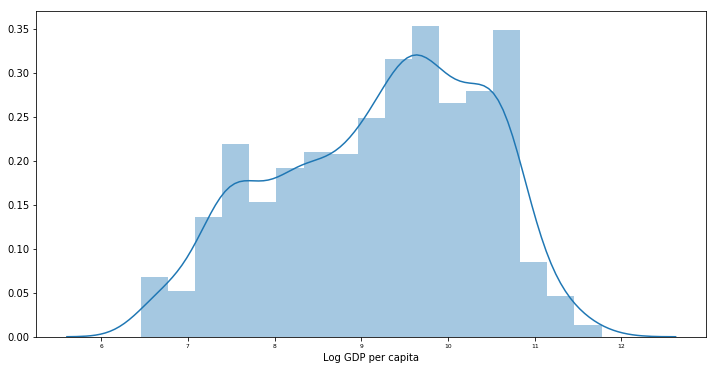

In [41]:
sns.distplot(df['Log GDP per capita'].dropna())

In [15]:
df.head(2)

,Country,Region,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Southern Asia,2008.0,3.723590,7.16869,0.450662,50.799999,0.718114,0.177889,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Southern Asia,2009.0,4.401778,7.33379,0.552308,51.200001,0.678896,0.200178,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df['Log GDP per capita'].describe()

count    1647.000000
mean        9.213981
std         1.182664
min         6.457201
25%         8.298149
50%         9.400388
75%        10.166996
max        11.770276
Name: Log GDP per capita, dtype: float64

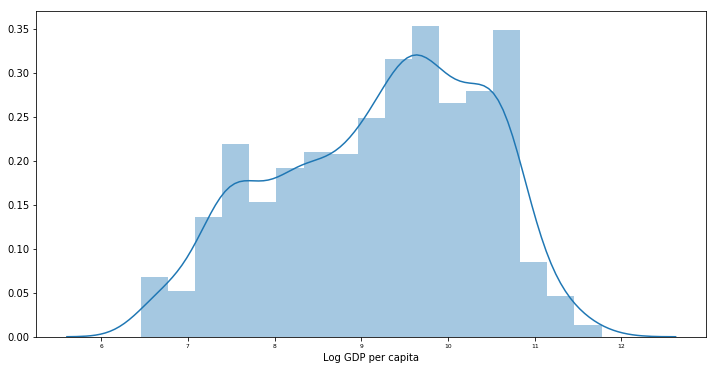

In [17]:
plt.rcParams["figure.figsize"] = (12,6)
sns.distplot(df['Log GDP per capita'].dropna());

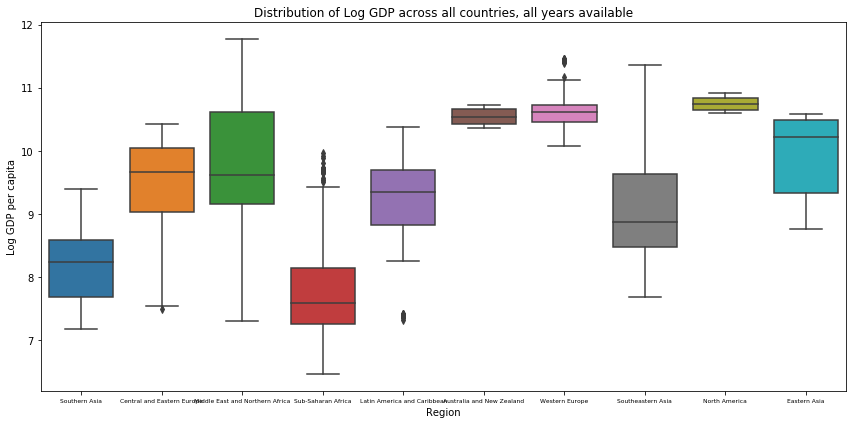

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Log GDP per capita'])
plt.title("Distribution of Log GDP across all countries, all years available")


plt.tight_layout()
plt.show()

From the above boxplots by geographic regions it is evident that there is great variations between regions in the distribution of GDP per capita.

## Social Support



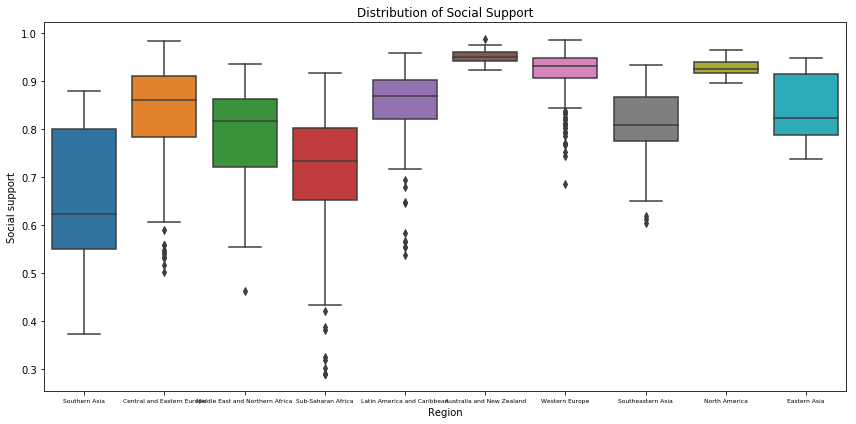

In [285]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Social support'])
plt.title("Distribution of Social Support")


plt.tight_layout()
plt.show()

## Freedom to make life choices

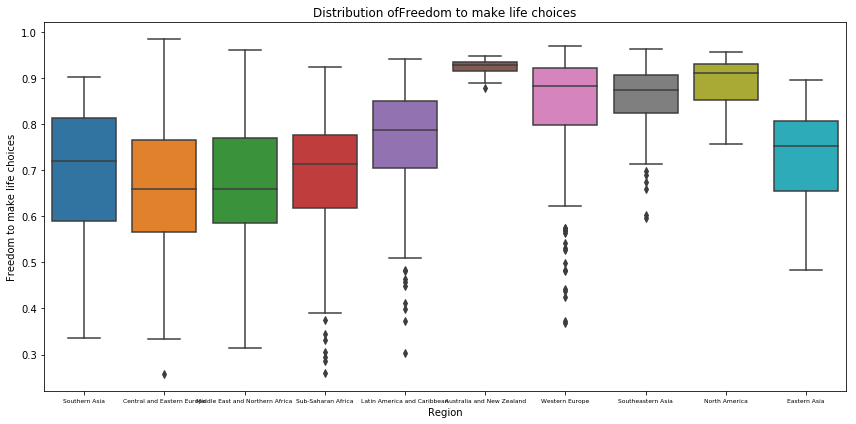

In [286]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Freedom to make life choices'])
plt.title("Distribution ofFreedom to make life choices")


plt.tight_layout()
plt.show()

## Healthy Life Expectancy at birth


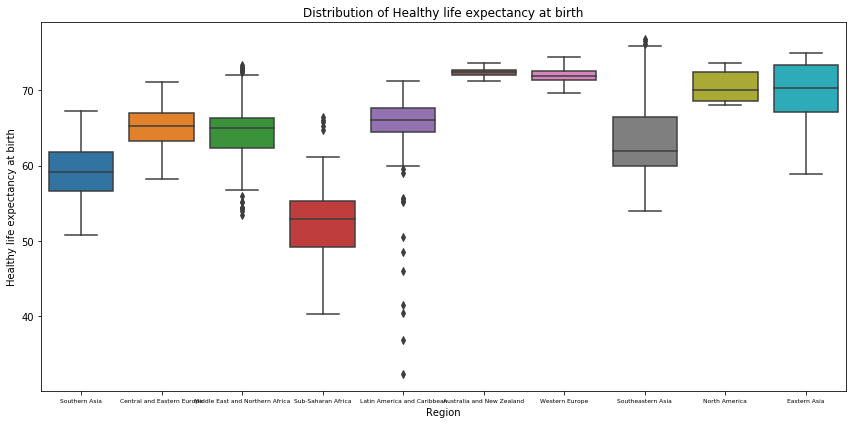

In [287]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Healthy life expectancy at birth'])
plt.title("Distribution of Healthy life expectancy at birth")


plt.tight_layout()
plt.show()

## Generosity


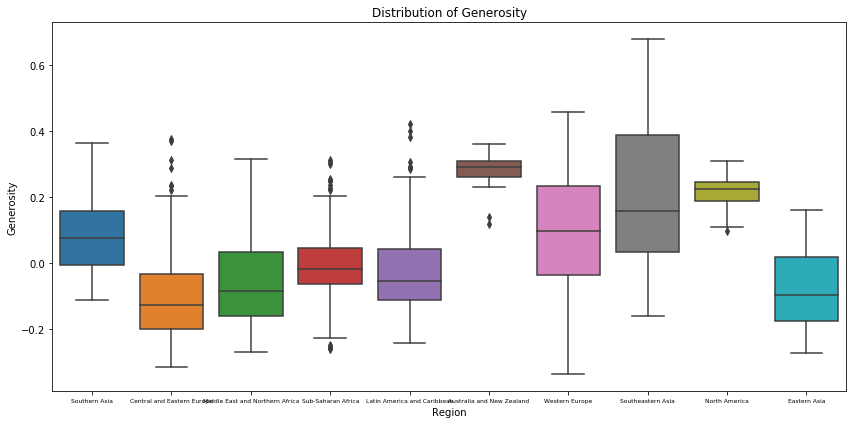

In [288]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Generosity'])
plt.title("Distribution of Generosity")


plt.tight_layout()
plt.show()

## Perceptions of Corruption

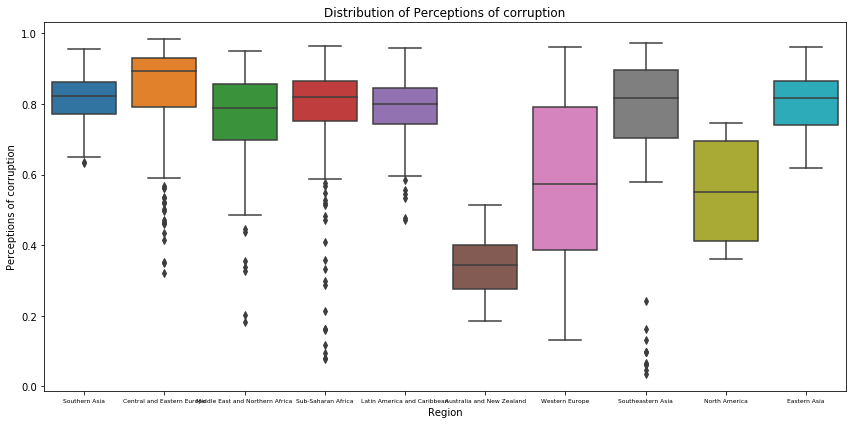

In [289]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['Perceptions of corruption'])
plt.title("Distribution of Perceptions of corruption")


plt.tight_layout()
plt.show()

## GINI index (World Bank estimate)

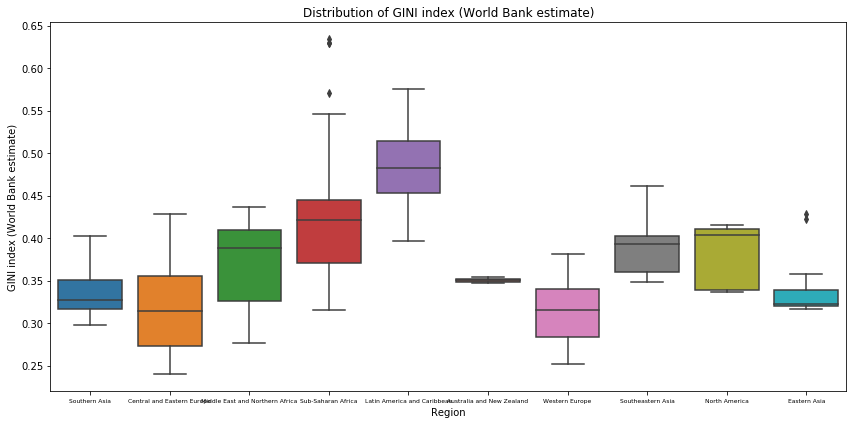

In [290]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['GINI index (World Bank estimate)'])
plt.title("Distribution of GINI index (World Bank estimate)")


plt.tight_layout()
plt.show()

## GINI index (World Bank estimate), average 2000-16

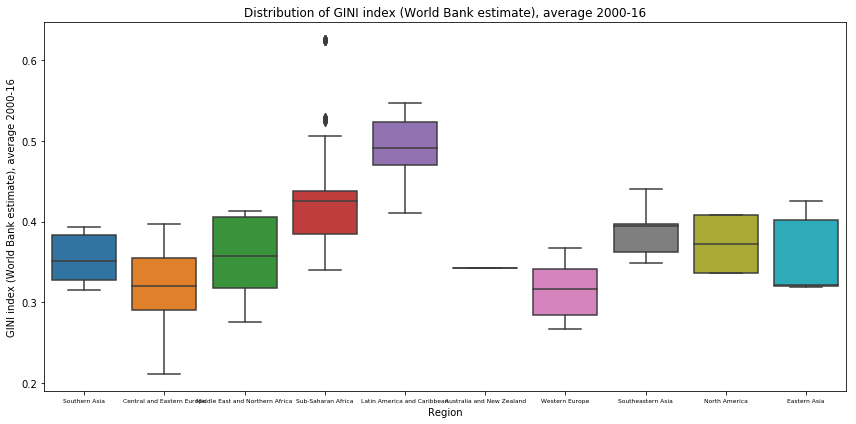

In [292]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['GINI index (World Bank estimate), average 2000-16'])
plt.title("Distribution of GINI index (World Bank estimate), average 2000-16")


plt.tight_layout()
plt.show()

## gini of household income reported in Gallup, by wp5-year

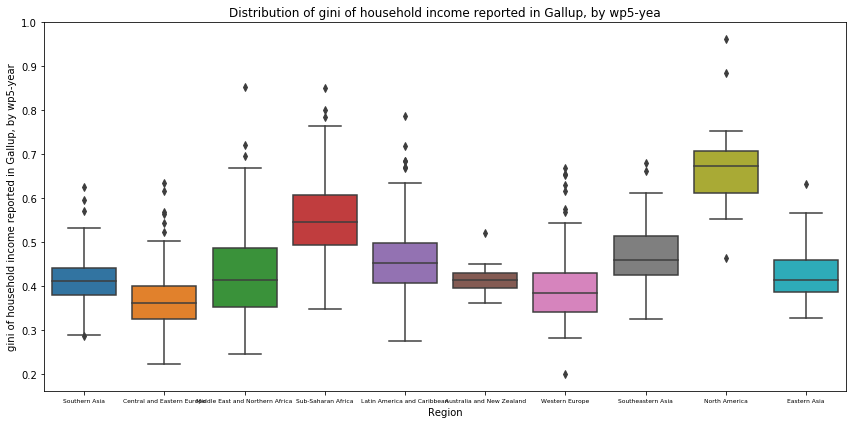

In [293]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["xtick.labelsize"] = 6

#plt.figure(figsize=(12,6))
sns.boxplot(x=df['Region'], y= df['gini of household income reported in Gallup, by wp5-year'])
plt.title("Distribution of gini of household income reported in Gallup, by wp5-yea")


plt.tight_layout()
plt.show()

df.head()

```python
# filter for a country
whr18.loc[whr18.loc[:,'Country']=='Ireland']
# sort by values of Life Ladder
WH2018.sort_values('Life Ladder', ascending=False)
```

CR.sort_values('Score', ascending=False).head(7)

WH2018.sort_values('Life Ladder', ascending=False).head(7)

whr18.head(3)
whr18.tail(3)

whr18['Happiness score'].describe()

WH2018['Life Ladder'].describe()

# HERE!
#### Western Europe - Region 1
Simulate a dataset for a region containing 20 countries with data simulated to correspond to the distribution of the variables in Western Europe.
There are too little observations this way. Look at bootstrap or amalgamate regions with simular statistics.


```
WE = CR.loc[CR.loc[:,'Region']=='Western Europe']
# drop na (North Cyprus)
WE.dropna()
```

```python
# loop through each of the countries in the region and plot the distributions
Z = WE.dropna() # set Z to be western Europe countries
for i in Z.iloc[:, 3:]:
    print(Z[i].describe())
    # plot a distogram
    sns.distplot(Z[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()
```

In [44]:
whr18.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.7689,7.829888,7.707912,2.713678,1.340243,1.587276,0.986145,0.595895,0.152708,0.392913
1,Denmark,7.6001,7.666658,7.533542,2.392891,1.383439,1.572595,0.996019,0.592356,0.252320,0.410473
2,Norway,7.5539,7.615639,7.492160,2.240764,1.487767,1.581548,1.028123,0.603500,0.271304,0.340884
3,Iceland,7.4936,7.613283,7.373917,2.400876,1.380163,1.623651,1.025653,0.590905,0.354356,0.117980
4,Netherlands,7.4876,7.542098,7.433102,2.392895,1.396020,1.521903,0.999314,0.557075,0.322440,0.297978


In [ ]:
f,axes = plt.subplots(1,2,figsize=(12,4))

## Health Life Expectancy by Region

df.columns

x = df['Health (Life Expectancy)']
sns.distplot(x)
plt.title("Distribution of Life Expectancy variable for all countries")

df.groupby('Region').describe()

for i in df.iloc[:, 3:]:
    # print the name of the column
    print(i)
    # print the column to see the values
    print(df[i])
    # plot a distogram
    sns.distplot(df[i])
    # need to close each histogram otherwise all will be plotted on the same figure
    plt.show()

I could simulate the data for the 157 countries. Sort them so that they are in the same rank as the original dataset.
There are 10 different regions which will likely have different distributions. 


```python
# create a list of country names by appending number to Country
# setup empty list for country
country=[]
# use for loop to append a number to 'country'
for i in range(1,157):
#i=np.arange(1,141)
  country.append('Country'+str(i))
#set up empty list for region
region=[]
# loop through, append a number to 'Region'
for i in range(1,11):
    region.append('Region'+str(i))
print(country)
print(region)
```

```python
country=[]
region=[]
for i in range(1,11):
    region.append('Region'+str(i))
    for j in range(1,15):
        country.append('Country'+str(i))
#print(region)
print(country) 
```

In [75]:
len(country)

156

In [189]:
x = np.random.normal(8.603,1.469,156)# a simulated normal distribution

In [192]:
d = {'Country': country,'samplevariable':x}

In [193]:
Simulate = pd.DataFrame(data=d)

In [194]:
Simulate.head()

,Country,samplevariable
0,Country1,8.764537
1,Country2,9.261981
2,Country3,9.806815
3,Country4,6.106897
4,Country5,5.164667


df.groupby('Region').mean()

### Plotting the distribution of the GDP per capita from the Happy Planet Index 2016
I am looking at cross section of GDP per capita rather than the distribution over time.
The distribution of GPD per capita here is very concentrated in the 0 to about 6000 per capita range. It has a very long tail to the right over to 120000 per capita which looks like a log normal shape.
Most countries have a lower rather than a higher GDP per capita.

The pareto distribution is used to model gdp per capita. The 80:20 rule
The right tail of income and wealth distributions often resemble pareto distributions.
<https://economics.mit.edu/files/10517>


sns.distplot(hpi16['GDPperCap'], bins=20)
plt.title("Happy Planet Index GDP per capita 2016");

This shows that most countries are quite poor.

In [11]:
hpi16['GDPperCap'].describe()

count       140.000000
mean      13911.068748
std       19746.184793
min         244.196486
25%        1628.064475
50%        5691.063252
75%       15159.065819
max      105447.093241
Name: GDPperCap, dtype: float64

### Get the log of GDP per capita and plot the distribution

```
### get the log of GDP per capita
hpi16['Log_GDP_perCap']= np.log(hpi16['GDPperCap'])
```

hpi16.describe()

```
# plot the distibution of the log of GDP per capita
sns.distplot(hpi16['Log_GDP_perCap'])
# plot the simulated normal distribution using mean and std of the log of GDP per capita
#sns.distplot(np.random.normal(8.603492,1.469307,140))
```

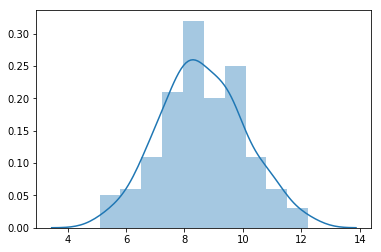

In [15]:
sns.distplot(np.random.normal(8.603,1.4693,140))

### Simulate the distribution

```
# plot the GDP per capita
sns.distplot(hpi16['GDPperCap'], bins=20)
plt.title("Happy Planet Index GDP per capita 2016");
```

sns.distplot(np.random.pareto(8.603, 1000));

<a id="worldhappiness"></a>
*** 


# The World Happiness Report

The World Happiness report has an excel spreadsheet with data for the the years up to 2016 in a sheet called 'Data for Table2.1'. The actual data for 2016 is in a sheet called 'Figure2.2'.
These correspond with the data from the reports.
There are reports from 2012 to 2019. I am using 2016 as the Happy Planet Index was calculated for 2016.(based on 2015).


There are annual reports from 2012 up to 2019 which report for the previous year.
There is a spreadsheet included for chapter 2 which contains the total data to date in the first sheet and the annual data from which the World Happiness scores are calculated in other sheets.

The larger sheets contain a column for the Log GDP per Capita with data that goes back to 2007 I think.
The latest file for the World Happiness Report of 2019 includes more up to data GDP data for 2016 than in the 2016 file. 

### World Happiness Report Figure2.2 data for 2016 report
The sheet called 'Figure2.2' contains the data for the 2016 index.
The log gdp per capita figures were estimated or forecast from the previous year as the figures were not yet available at the time of the report being prepared in 2016.


```# write to csv
whr_19_data.to_csv("WHR_Data_2019report.csv")
whr_16_data.to_csv("WHR_Data_2016report.csv")
```


`!ls`

data16=pd.read_csv("WHR_Data_2016report.csv", index_col=0)
data19= pd.read_csv("WHR_Data_2019report.csv", index_col=0)

## GDP

#### The World Happiness Report 2016:
Log GDP per capita is in terms of purchasing power parity (PPP) adjusted to constant 2011 international dollar prices taken from the December 22, 2015 release of the World Development Indicators (WDI).

sns.distplot(whi16['Explained by: GDP per capita']);

#### Data up to 2016 and data up to 2019

In [39]:
data16.head(2)

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183399,0.881686,...,NaN,NaN,0.476129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204900,0.850035,...,NaN,NaN,0.440242,0.286315,NaN,NaN,NaN,NaN,NaN,NaN


f,axes = plt.subplots(1,2,figsize=(12,4))
sns.distplot(data16['Log GDP per capita'].dropna(), ax=axes[0])
axes[0].set_title("Log GDP p/c to 2016");
sns.distplot(data19['Log GDP per capita'].dropna(), ax=axes[1])
axes[1].set_title("Log GDP p/c to 2019");
plt.suptitle("Log GDP per capita to 2016 and 2019");

#### Some statistics

data16['Log GDP per capita'].describe()

data19['Log GDP per capita'].describe()

Looking at the Happy Planet Index data for 2016. This contains the `GDP/capita ($PPP)`.


hpi16.head()

sns.distplot(hpi16['Log_GDP_perCap'])
plt.title("Log of GDP per capita")
plt.suptitle("Happy Planet Index 2016");

In [49]:
hpi16['Log_GDP_perCap'].describe()

count    140.000000
mean       8.603492
std        1.469307
min        5.497973
25%        7.395039
50%        8.646650
75%        9.626348
max       11.565965
Name: Log_GDP_perCap, dtype: float64

## Simulating log GDP per capita.
Taking the means and standard deviations, simulating a normal distribution.  This clearly does not resemble the distribution of the actual log GDP per capita across the countries above.

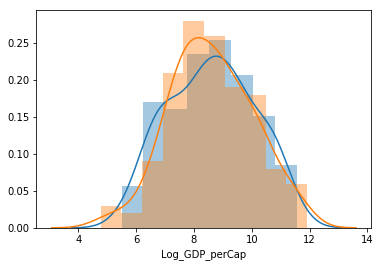

In [51]:
sns.distplot(hpi16['Log_GDP_perCap']) # the actual distribution
sns.distplot(np.random.normal(8.603,1.469,140))# a simulated normal distribution

In [92]:
x = np.random.normal(8.603,1.469,140)# a simulated normal distribution

hpi16.head()

### Average Life Expectancy

This is a left skewed distribution and is not normally distributed.
The mean is less than the median

The three most commonly used transformatiosn for quantitative data are the logarithm, the square root and the reciprocal. These are called variance_stabilising.

Pareto and Power distributions.

sns.distplot(hpi16['Average_Life_Expectancy'], bins=30);

sns.distplot(np.log10(hpi16['Average_Life_Expectancy']))

sns.boxplot(hpi16['Average_Life_Expectancy'])

hpi16['Average_Life_Expectancy'].describe()

a,m = 71,50
s=(np.random.pareto(a,140)+1)*m
sns.distplot(s)

s= np.random.uniform(48.91,83.572,140)
sns.distplot(s)

a=76
samples =1400
s=np.random.power(a,samples)
sns.distplot(s)

In [162]:
s

array([0.9918, 0.998 , 0.9989, ..., 0.9871, 0.9958, 0.9996])

hpi16.groupby(['Region','Average_Life_Expectancy']).sum()

y= np.random.normal(70.925,8.725,140)#
sns.distplot(y)